## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from simple_colors import *
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotnine import *


## Load and read data

In [122]:
# loading the dataset to pandas dataframe
df = pd.read_csv("hrdata.csv",
parse_dates=['DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date'])
df.head()

C:\Users\ostab\AppData\Local\Temp\ipykernel_24028\2778445174.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2


In [3]:
df.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2019-02-28,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,2015-09-02,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2019-02-21,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2019-02-01,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,...,David Stanley,14.0,LinkedIn,Fully Meets,4.50,5,0,2019-01-30,0,2


In [4]:
#Dataset Size
df.shape

(311, 36)

In [5]:
print("Dataset has {} data  with {} variables each.".format(*df.shape))

Dataset has 311 data  with 36 variables each.


# Explotory Data Analysis (EDA) & Visualization

In [6]:
df.reindex()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2019-02-28,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,2015-09-02,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2019-02-21,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2019-02-01,0,11


In [7]:
# statistical measure of dataset
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,DOB,DateofHire,DateofTermination,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,311,311,104,303.000000,311.000000,311.000000,311.000000,311,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,...,2001-08-10 11:16:00.771704192,2013-02-03 22:50:32.797427712,2015-06-14 11:46:09.230769152,14.570957,4.110000,3.890675,1.218650,2017-09-10 21:17:56.527331072,0.414791,10.237942
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,...,1973-01-12 00:00:00,2006-01-09 00:00:00,2010-08-30 00:00:00,1.000000,1.120000,1.000000,0.000000,2010-07-14 00:00:00,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,...,1980-02-16 12:00:00,2011-07-11 00:00:00,2014-01-10 12:00:00,10.000000,3.690000,3.000000,0.000000,2016-03-19 12:00:00,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,...,1985-09-15 00:00:00,2013-02-18 00:00:00,2015-09-22 00:00:00,15.000000,4.280000,4.000000,0.000000,2019-01-16 00:00:00,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,...,1990-09-07 00:00:00,2014-09-23 12:00:00,2016-09-08 06:00:00,19.000000,4.700000,5.000000,0.000000,2019-02-04 00:00:00,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,...,2072-11-21 00:00:00,2018-07-09 00:00:00,2018-11-10 00:00:00,39.000000,5.000000,5.000000,8.000000,2019-02-28 00:00:00,6.000000,20.000000
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,...,NaN,NaN,NaN,8.078306,0.789938,0.909241,2.349421,NaN,1.294519,5.852596


In [8]:
#Get information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

**Commits**
*We only have NULL values in "DateofTermination" & "ManagerID" columns

In [9]:
#check missing values
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [10]:
df.DateofTermination.value_counts()

DateofTermination
2018-08-19    2
2012-09-24    2
2016-05-17    2
2015-09-07    2
2014-04-04    2
             ..
2014-01-11    1
2011-05-30    1
2015-03-15    1
2015-06-25    1
2015-09-29    1
Name: count, Length: 96, dtype: int64

In [11]:
df.fillna("0",inplace=True)
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2019-02-28,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,2015-09-02,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2019-02-21,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2019-02-01,0,11


In [12]:
df.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [13]:
df.drop_duplicates(inplace=True)
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2019-02-28,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,2015-09-02,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2019-02-21,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2019-02-01,0,11


**Commits**
*The data types are appropriate.*
*The dataset covers data on 311 employees.*
*104 out of 311 employees no longer work for the company.*
*Missing values in the DateofTermination column mean that 207 persons are still employed*

In [14]:
#First, we will check and fix the DOB dates of the original %m/%d/%y format, which Pandas might not convert correctly. In other words, some years like 71, 72 etc. can be converted to 2071, 2072.
df.query('@df.DOB.dt.year > 2000').DOB.dt.year.sort_values().unique()

array([2051, 2052, 2053, 2054, 2055, 2058, 2059, 2061, 2063, 2064, 2065,
       2066, 2067, 2068, 2069, 2070, 2071, 2072])

In [15]:
df['DOB'] = np.where(df['DOB'].dt.year >= df['DateofHire'].dt.year, df['DOB'] - pd.offsets.DateOffset(years=100), df['DOB'])

In [16]:
df.select_dtypes(include='datetime').describe()

,DOB,DateofHire,LastPerformanceReview_Date
count,311,311,311
mean,1979-02-06 09:48:02.315112544,2013-02-03 22:50:32.797427712,2017-09-10 21:17:56.527331072
min,1951-01-02 00:00:00,2006-01-09 00:00:00,2010-07-14 00:00:00
25%,1973-12-03 00:00:00,2011-07-11 00:00:00,2016-03-19 12:00:00
50%,1980-09-30 00:00:00,2013-02-18 00:00:00,2019-01-16 00:00:00
75%,1986-05-29 12:00:00,2014-09-23 12:00:00,2019-02-04 00:00:00
max,1992-08-17 00:00:00,2018-07-09 00:00:00,2019-02-28 00:00:00


**Commits**
The company was founded in 2006 (the minimum DateofHire is 2006-01-09)
The time period covered by the dataset includes 2019 (the maximum date value in the dataset is 2019-02-28)

In [17]:
for column in df.select_dtypes(include='O').columns:
    print(blue(f'{column}', 'bold')) 
    print(black('Number of unique values :', 'underlined'), df[column].nunique())
    if column == 'Employee_Name':
        print(df[column].unique()[:30])
    else:
        print(df[column].unique())
    print()

Employee_Name
Number of unique values : 311
['Adinolfi, Wilson  K' 'Ait Sidi, Karthikeyan   ' 'Akinkuolie, Sarah'
 'Alagbe,Trina' 'Anderson, Carol ' 'Anderson, Linda  ' 'Andreola, Colby'
 'Athwal, Sam' 'Bachiochi, Linda' 'Bacong, Alejandro '
 'Baczenski, Rachael  ' 'Barbara, Thomas' 'Barbossa, Hector'
 'Barone, Francesco  A' 'Barton, Nader' 'Bates, Norman' 'Beak, Kimberly  '
 'Beatrice, Courtney ' 'Becker, Renee' 'Becker, Scott' 'Bernstein, Sean'
 'Biden, Lowan  M' 'Billis, Helen' 'Blount, Dianna' 'Bondwell, Betsy'
 'Booth, Frank' 'Boutwell, Bonalyn' 'Bozzi, Charles' 'Brill, Donna'
 'Brown, Mia']

Position
Number of unique values : 32
['Production Technician I' 'Sr. DBA' 'Production Technician II'
 'Software Engineer' 'IT Support' 'Data Analyst' 'Database Administrator'
 'Enterprise Architect' 'Sr. Accountant' 'Production Manager'
 'Accountant I' 'Area Sales Manager' 'Software Engineering Manager'
 'BI Director' 'Director of Operations' 'Sr. Network Engineer'
 'Sales Manager' 'BI Devel

**Commits**


Extra white spaces found in the columns Employee_Name (as well as the lack of white spaces), Department

Different format of names in the Employee_Name and ManagerName columns. It would be useful to bring them to the same format in order to check which of the managers is an employee of the company

The column HispanicLatino partially duplicates the column RaceDesc and has different formats for recording the same values: 'No', 'Yes', 'no', 'yes'

No HR specialists found. 

It is also not clear how product quality is controlled. Since this is a production company, theoretically there should be positions responsible for product quality (quality engineers etc.)

In [18]:
#Remove the extra white spaces and bring the Employee_Name and ManagerName columns to the same format.
#transform the values of the TermReason and HispanicLatino columns to lowercase.

df['Employee_Name'] = [" ".join(n.split(',')[::-1]) for n in df['Employee_Name']]

In [19]:
df['Employee_Name'] = df['Employee_Name'].replace("\s+", " ", regex=True).str.strip()

In [20]:
df['ManagerName'] = df['ManagerName'].str.replace('.','', regex=True)

In [21]:
df['Department'] = df['Department'].str.strip()

In [22]:
df['Position'] = df['Position'].str.strip()

In [23]:
df['TermReason'] = df['TermReason'].str.lower()

In [24]:
df['HispanicLatino'] = df['HispanicLatino'].str.lower()

In [25]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,Wilson K Adinolfi,10026,0,0,1,1,5,4,0,62506,...,,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,Karthikeyan Ait Sidi,10084,1,1,1,5,3,3,0,104437,...,,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,Sarah Akinkuolie,10196,1,1,0,5,5,3,0,64955,...,,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,Trina Alagbe,10088,1,1,0,1,5,3,0,64991,...,,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,Carol Anderson,10069,0,2,0,5,5,3,0,50825,...,,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,Jason Woodson,10135,0,0,1,1,5,3,0,65893,...,,20.0,LinkedIn,Fully Meets,4.07,4,0,2019-02-28,0,13
307,Catherine Ybarra,10301,0,0,0,5,5,1,0,48513,...,,12.0,Google Search,PIP,3.20,2,0,2015-09-02,5,4
308,Jennifer Zamora,10010,0,0,0,1,3,4,0,220450,...,,2.0,Employee Referral,Exceeds,4.60,5,6,2019-02-21,0,16
309,Julia Zhou,10043,0,0,0,1,3,3,0,89292,...,,4.0,Employee Referral,Fully Meets,5.00,3,5,2019-02-01,0,11


## DATA VISUALIZATION

In [26]:
#For convenience of analysis, we divide the employees into active and terminated. 
#Add employee age and length of service (the number of years an employee has been working for the company).

In [27]:
df_active = df.query('EmploymentStatus=="Active"')
df_active

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,Wilson K Adinolfi,10026,0,0,1,1,5,4,0,62506,...,,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
3,Trina Alagbe,10088,1,1,0,1,5,3,0,64991,...,,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
5,Linda Anderson,10002,0,0,0,1,5,4,0,57568,...,,11.0,LinkedIn,Exceeds,5.00,5,0,2019-01-07,0,15
6,Colby Andreola,10194,0,0,0,1,4,3,0,95660,...,,10.0,LinkedIn,Fully Meets,3.04,3,4,2019-01-02,0,19
7,Sam Athwal,10062,0,4,1,1,5,3,0,59365,...,,19.0,Employee Referral,Fully Meets,5.00,4,0,2019-02-25,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Hang T Wolk,10174,0,0,0,1,5,3,0,60446,...,,14.0,LinkedIn,Fully Meets,3.40,4,0,2019-02-21,0,14
306,Jason Woodson,10135,0,0,1,1,5,3,0,65893,...,,20.0,LinkedIn,Fully Meets,4.07,4,0,2019-02-28,0,13
308,Jennifer Zamora,10010,0,0,0,1,3,4,0,220450,...,,2.0,Employee Referral,Exceeds,4.60,5,6,2019-02-21,0,16
309,Julia Zhou,10043,0,0,0,1,3,3,0,89292,...,,4.0,Employee Referral,Fully Meets,5.00,3,5,2019-02-01,0,11


In [28]:
df_terminated = df.query('EmploymentStatus!="Active"')
df_terminated


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,Karthikeyan Ait Sidi,10084,1,1,1,5,3,3,0,104437,...,,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,Sarah Akinkuolie,10196,1,1,0,5,5,3,0,64955,...,,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
4,Carol Anderson,10069,0,2,0,5,5,3,0,50825,...,,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2
10,Rachael Baczenski,10252,1,1,0,5,5,3,1,54670,...,,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,2016-01-30,0,12
11,Thomas Barbara,10242,1,1,1,5,5,3,1,47211,...,,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,2016-05-06,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Barry Wilber,10048,1,1,1,5,5,3,0,55140,...,,11.0,Website,Fully Meets,5.00,3,0,2015-02-15,0,7
302,Annie Wilkes,10204,0,2,0,5,5,3,0,58062,...,,19.0,Google Search,Fully Meets,3.60,5,0,2011-02-06,0,9
303,Jacquelyn Williams,10264,0,0,0,5,5,3,1,59728,...,,19.0,Diversity Job Fair,Fully Meets,4.30,4,0,2014-06-02,0,16
304,Jordan Winthrop,10033,0,0,1,5,5,4,0,70507,...,,12.0,LinkedIn,Exceeds,5.00,3,0,2016-01-19,0,7


In [29]:
df_active['Age'] =df_active['LastPerformanceReview_Date'].dt.year.max() - df_active['DOB'].dt.year

C:\Users\ostab\AppData\Local\Temp\ipykernel_24028\4056627729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
df_active['LengthOfService'] = df_active['LastPerformanceReview_Date'].dt.year.max() - df_active['DateofHire'].dt.year

C:\Users\ostab\AppData\Local\Temp\ipykernel_24028\288561966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
fig = go.Figure(go.Choropleth(locationmode = 'USA-states', 
                              name='State/#Employees/Dept.',  
                              locations = df_active.groupby('State').Employee_Name.count().index,
                              z = df_active.groupby('State').Employee_Name.count().values, 
                              text = df_active.groupby('State').Department.unique(), 
                              colorscale = 'Mint', 
                              colorbar=dict(title='number of<br>employees', 
                                            title_font_size=10, thickness=15, 
                                            tickmode='array',
                                            tickvals=[df_active.groupby('State').Employee_Name.count().min(),
                                                      df_active.groupby('State').Employee_Name.count().max()],  
                                            tickfont_size=8, ticks='outside')))
                
fig.add_scattergeo(
    locationmode='USA-states',
    locations=df_active.groupby('State').Employee_Name.count().index,
    text=df_active.groupby("State").Employee_Name.count(),
    mode='text', hoverinfo='skip')                
                
fig.update_layout(title = 'Company Geography', 
                  title_x=0.5, 
                  margin=dict(t=50, l=0, r=0, b=0), 
                  geo = dict(scope='usa'))

fig

### Now, some charts for the most relevant information of the data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [37]:
df1 = df.rename(columns={'Termd':'Terminated'})

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Terminated                  311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [39]:
df1.TermReason.value_counts()

TermReason
n/a-stillemployed                   207
another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
no-call, no-show                      4
military                              4
retiring                              4
performance                           4
maternity leave - did not return      3
medical issues                        3
learned that he is a gangster         1
fatal attraction                      1
gross misconduct                      1
Name: count, dtype: int64

In [40]:
df1.drop(df[(df['TermReason'] == "n/a-stillemployed")].index, inplace=True)

In [41]:
df1.TermReason.value_counts()

TermReason
another position                    20
unhappy                             14
more money                          11
career change                        9
hours                                8
attendance                           7
return to school                     5
relocation out of area               5
no-call, no-show                     4
military                             4
retiring                             4
performance                          4
maternity leave - did not return     3
medical issues                       3
learned that he is a gangster        1
fatal attraction                     1
gross misconduct                     1
Name: count, dtype: int64

In [42]:
df1.drop(df1[(df1['Terminated'] == "0")].index, inplace=True)

In [43]:
df1.Terminated.value_counts()

Terminated
1    104
Name: count, dtype: int64

C:\Users\ostab\AppData\Local\Temp\ipykernel_24028\4048260152.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


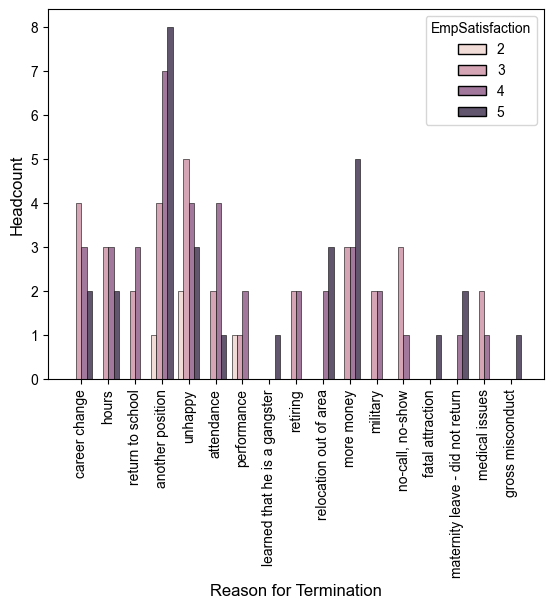

In [44]:
fig= sns.histplot(data=df1, x="TermReason", hue="EmpSatisfaction" , multiple="dodge", shrink=.8)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_xlabel("Reason for Termination", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})


fig= sns.histplot(data=df1, x="TermReason", hue="Sex", multiple="dodge", shrink=.8, palette = "Set3")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_xlabel("Termination Reason", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)

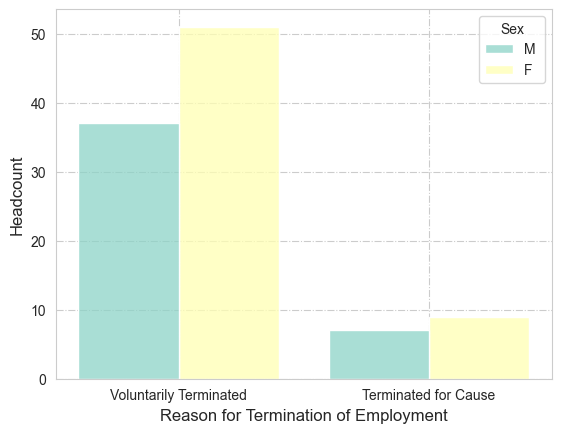

In [45]:
fig= sns.histplot(data=df1, x="EmploymentStatus", hue="Sex", multiple="dodge", shrink=.8, palette = "Set3")
fig.set_xlabel("Reason for Termination of Employment", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

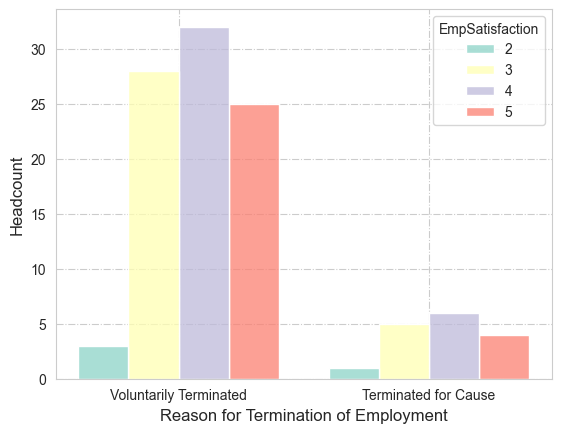

In [46]:
fig= sns.histplot(data=df1, x="EmploymentStatus", hue="EmpSatisfaction", multiple="dodge", shrink=.8, palette = "Set3")
fig.set_xlabel("Reason for Termination of Employment", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

C:\Users\ostab\AppData\Local\Temp\ipykernel_24028\3351881614.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


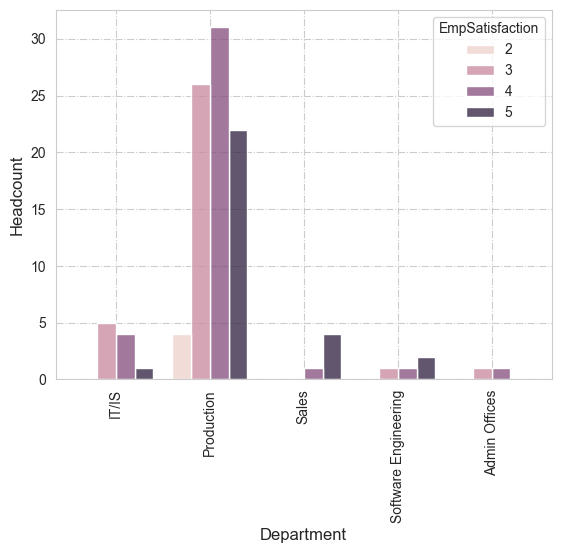

In [47]:
fig= sns.histplot(data=df1, x="Department",hue="EmpSatisfaction", multiple="dodge", shrink=.8)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_xlabel("Department", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

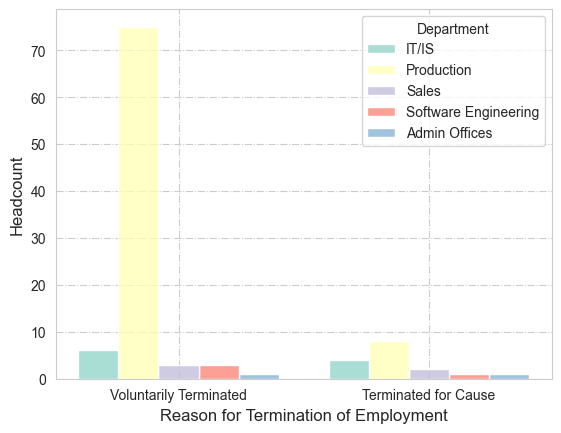

In [48]:
fig= sns.histplot(data=df1, x="EmploymentStatus", hue="Department",  multiple="dodge", shrink=.8, palette = "Set3")
fig.set_xlabel("Reason for Termination of Employment", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

In [49]:
df.SpecialProjectsCount.value_counts()

SpecialProjectsCount
0    241
6     21
5     21
7     12
4      9
3      3
8      2
2      1
1      1
Name: count, dtype: int64

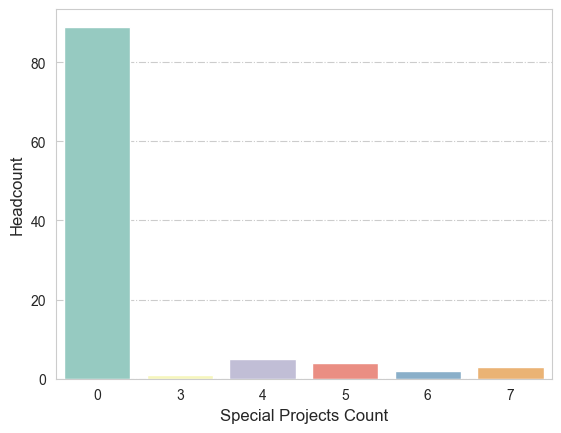

In [54]:
fig= sns.countplot(df1, x="SpecialProjectsCount", palette = "Set3")
fig.set_xlabel("Special Projects Count", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

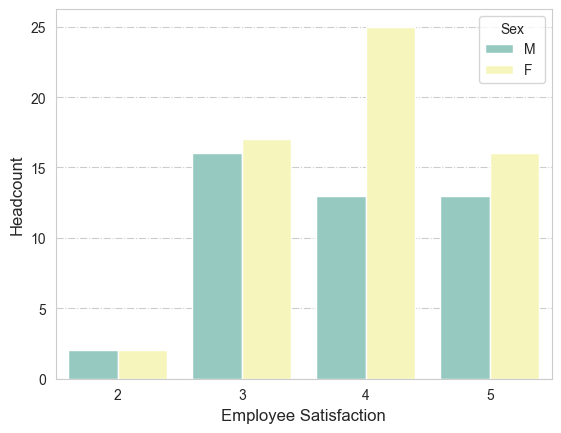

In [57]:
fig= sns.countplot(df1, x="EmpSatisfaction", hue="Sex", palette = "Set3")
fig.set_xlabel("Employee Satisfaction", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

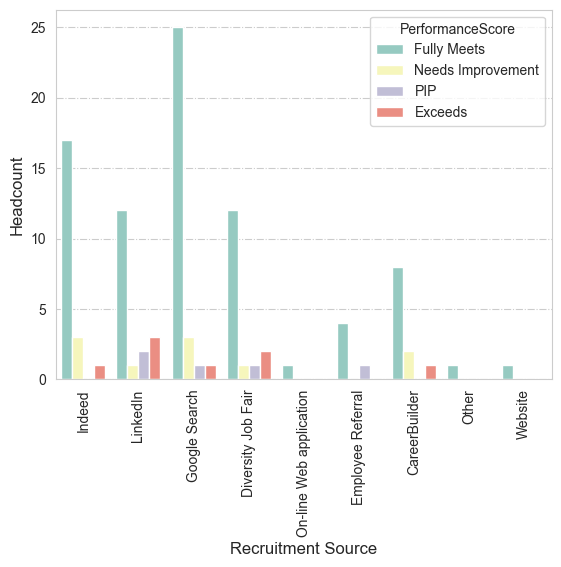

In [58]:
fig= sns.countplot(df1, x="RecruitmentSource", hue="PerformanceScore", palette = "Set3" )
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_xlabel("Recruitment Source", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

fig= sns.countplot(df1, x="Department", palette = "Set3" )
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_xlabel("Department", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)

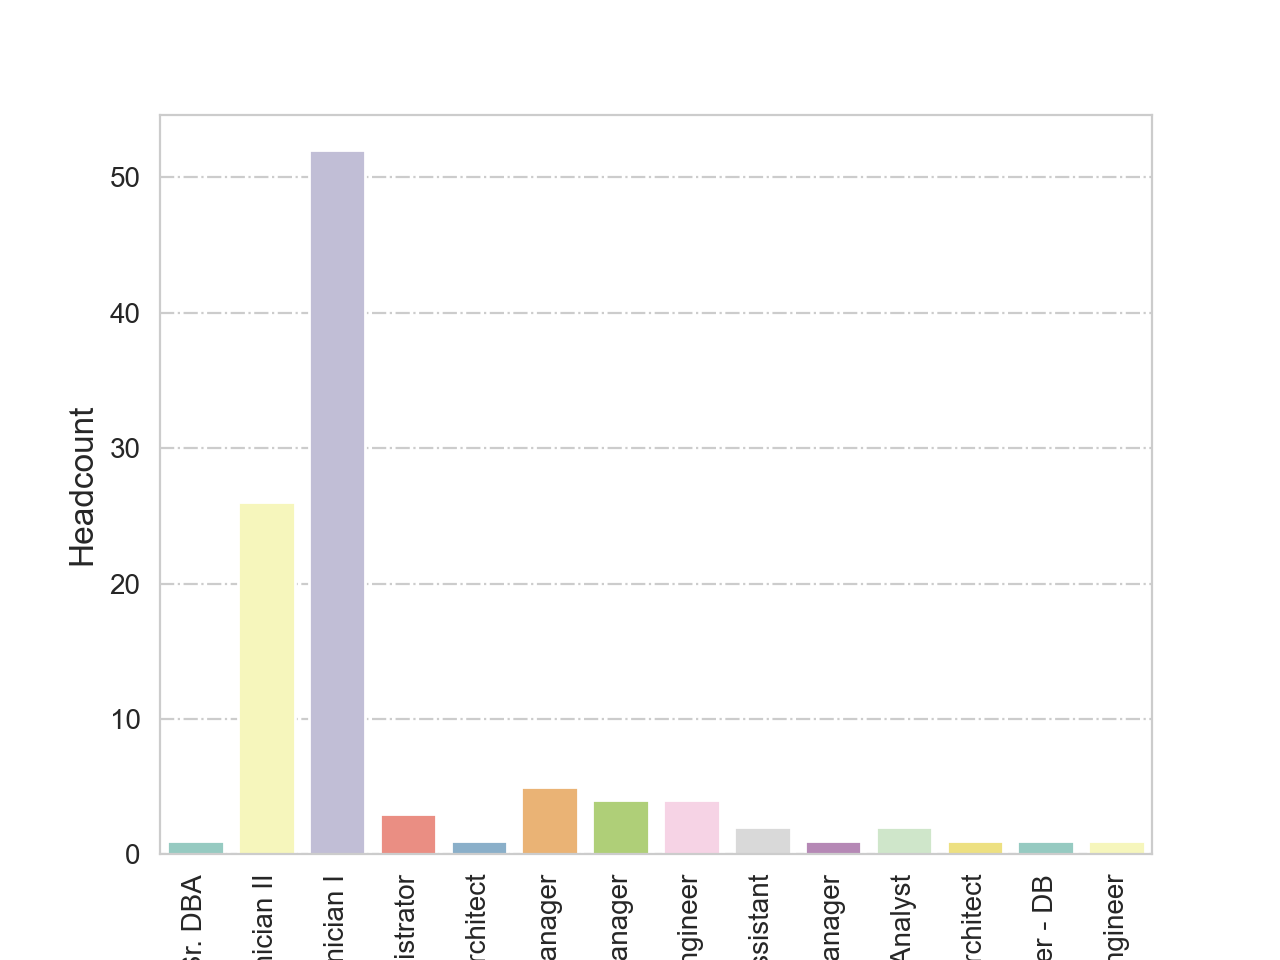

In [181]:
fig= sns.countplot(df1, x="Position", palette = "Set3" )
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_xlabel("Position", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

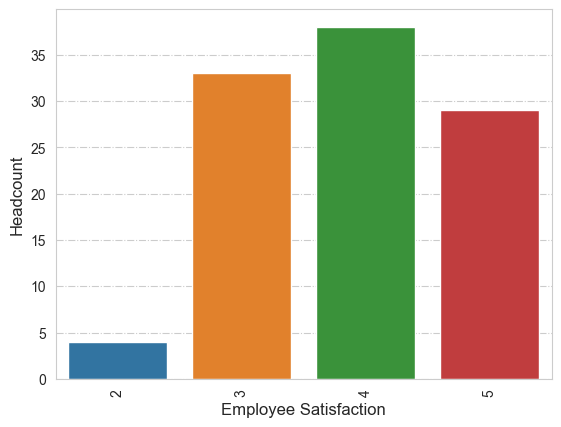

In [61]:
fig= sns.countplot(data=df1, x="EmpSatisfaction")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_xlabel("Employee Satisfaction", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

In [62]:
df1.Sex.value_counts()

Sex
F     60
M     44
Name: count, dtype: int64

In [63]:
data = pd.concat([df1["Terminated"],df["Sex"]], axis =1)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, 1 to 310
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Terminated  104 non-null    float64
 1   Sex         311 non-null    object 
dtypes: float64(1), object(1)
memory usage: 7.3+ KB


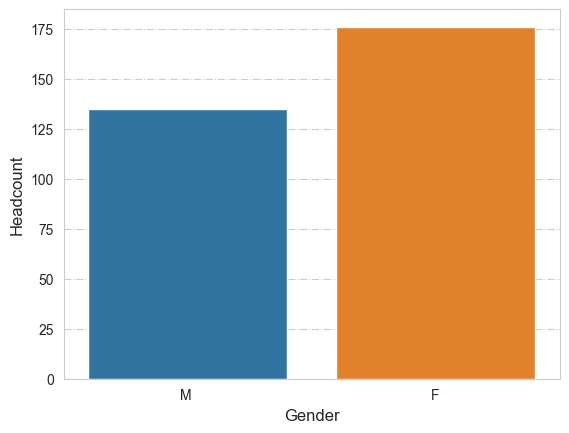

In [65]:
fig = sns.countplot(data=data, x="Sex")
fig.set_xlabel("Gender", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

Text(0, 0.5, 'Headcount')

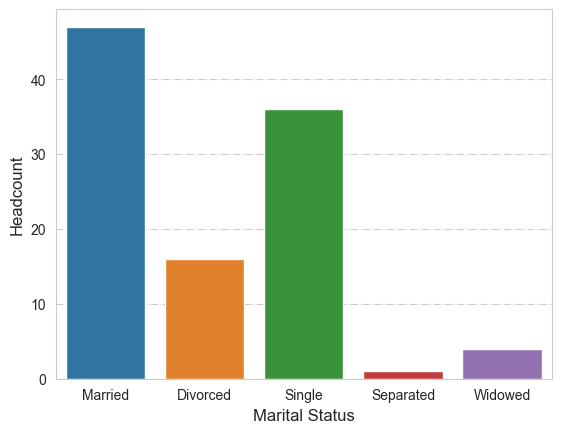

In [66]:
fig=sns.countplot(data=df1, x="MaritalDesc")
sns.set_style("whitegrid", {'grid.linestyle': '-.'})
fig.set_xlabel("Marital Status", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)


## Analysis to find hidden information in the data.

### About Employee's gender

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [68]:
df['Sex']

0      M 
1      M 
2       F
3       F
4       F
       ..
306    M 
307     F
308     F
309     F
310     F
Name: Sex, Length: 311, dtype: object

In [69]:
df['Sex'].unique()

array(['M ', 'F'], dtype=object)

In [70]:
df['Sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0      M 
1      M 
2       F
3       F
4       F
       ..
306    M 
307     F
308     F
309     F
310     F
Name: Sex, Length: 311, dtype: object>

In [71]:
df.Sex.unique()

array(['M ', 'F'], dtype=object)

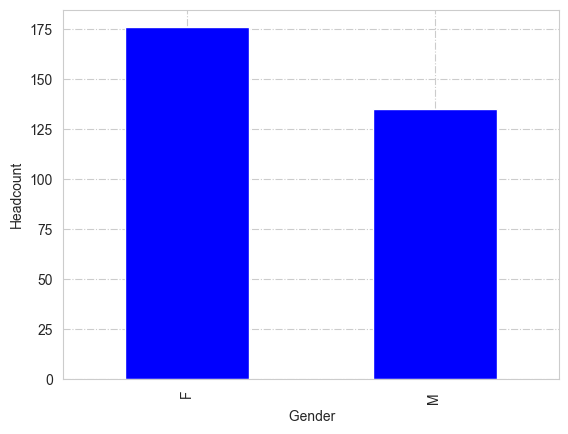

In [73]:
df.Sex.value_counts().plot(kind="bar", color = 'b')
plt.xlabel(' Gender')
plt.ylabel('Headcount')
plt.show()


### About worker's marital status

In [74]:
df.MaritalDesc.value_counts()

MaritalDesc
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64

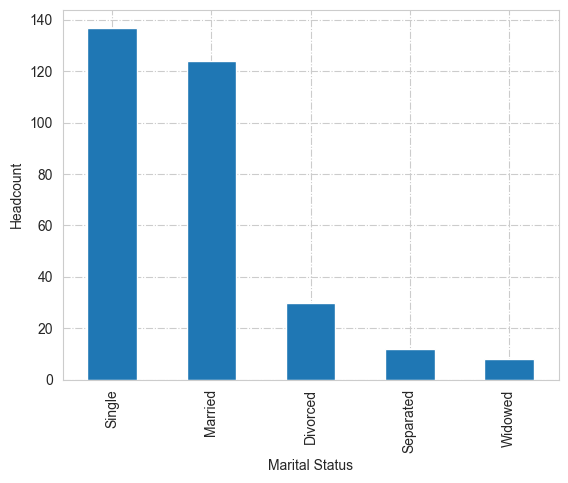

In [75]:
df.MaritalDesc.value_counts().plot(kind="bar")
plt.xlabel('Marital Status')
plt.ylabel('Headcount')

plt.show()

### About the results of the employee satisfaction survey

In [76]:
df.EmpSatisfaction.value_counts()

EmpSatisfaction
3    108
5     98
4     94
2      9
1      2
Name: count, dtype: int64

3.8906752411575565


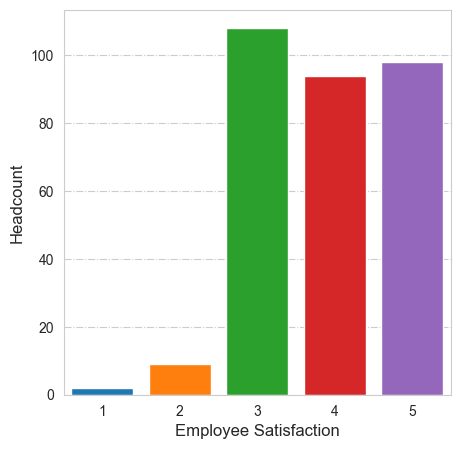

In [77]:
plt.figure(figsize=(5,5))
fig= sns.countplot(x='EmpSatisfaction',data=df,saturation=1)
fig.set_xlabel("Employee Satisfaction", fontsize=12)
fig.set_ylabel("Headcount", fontsize=12)

print(df['EmpSatisfaction'].mean())

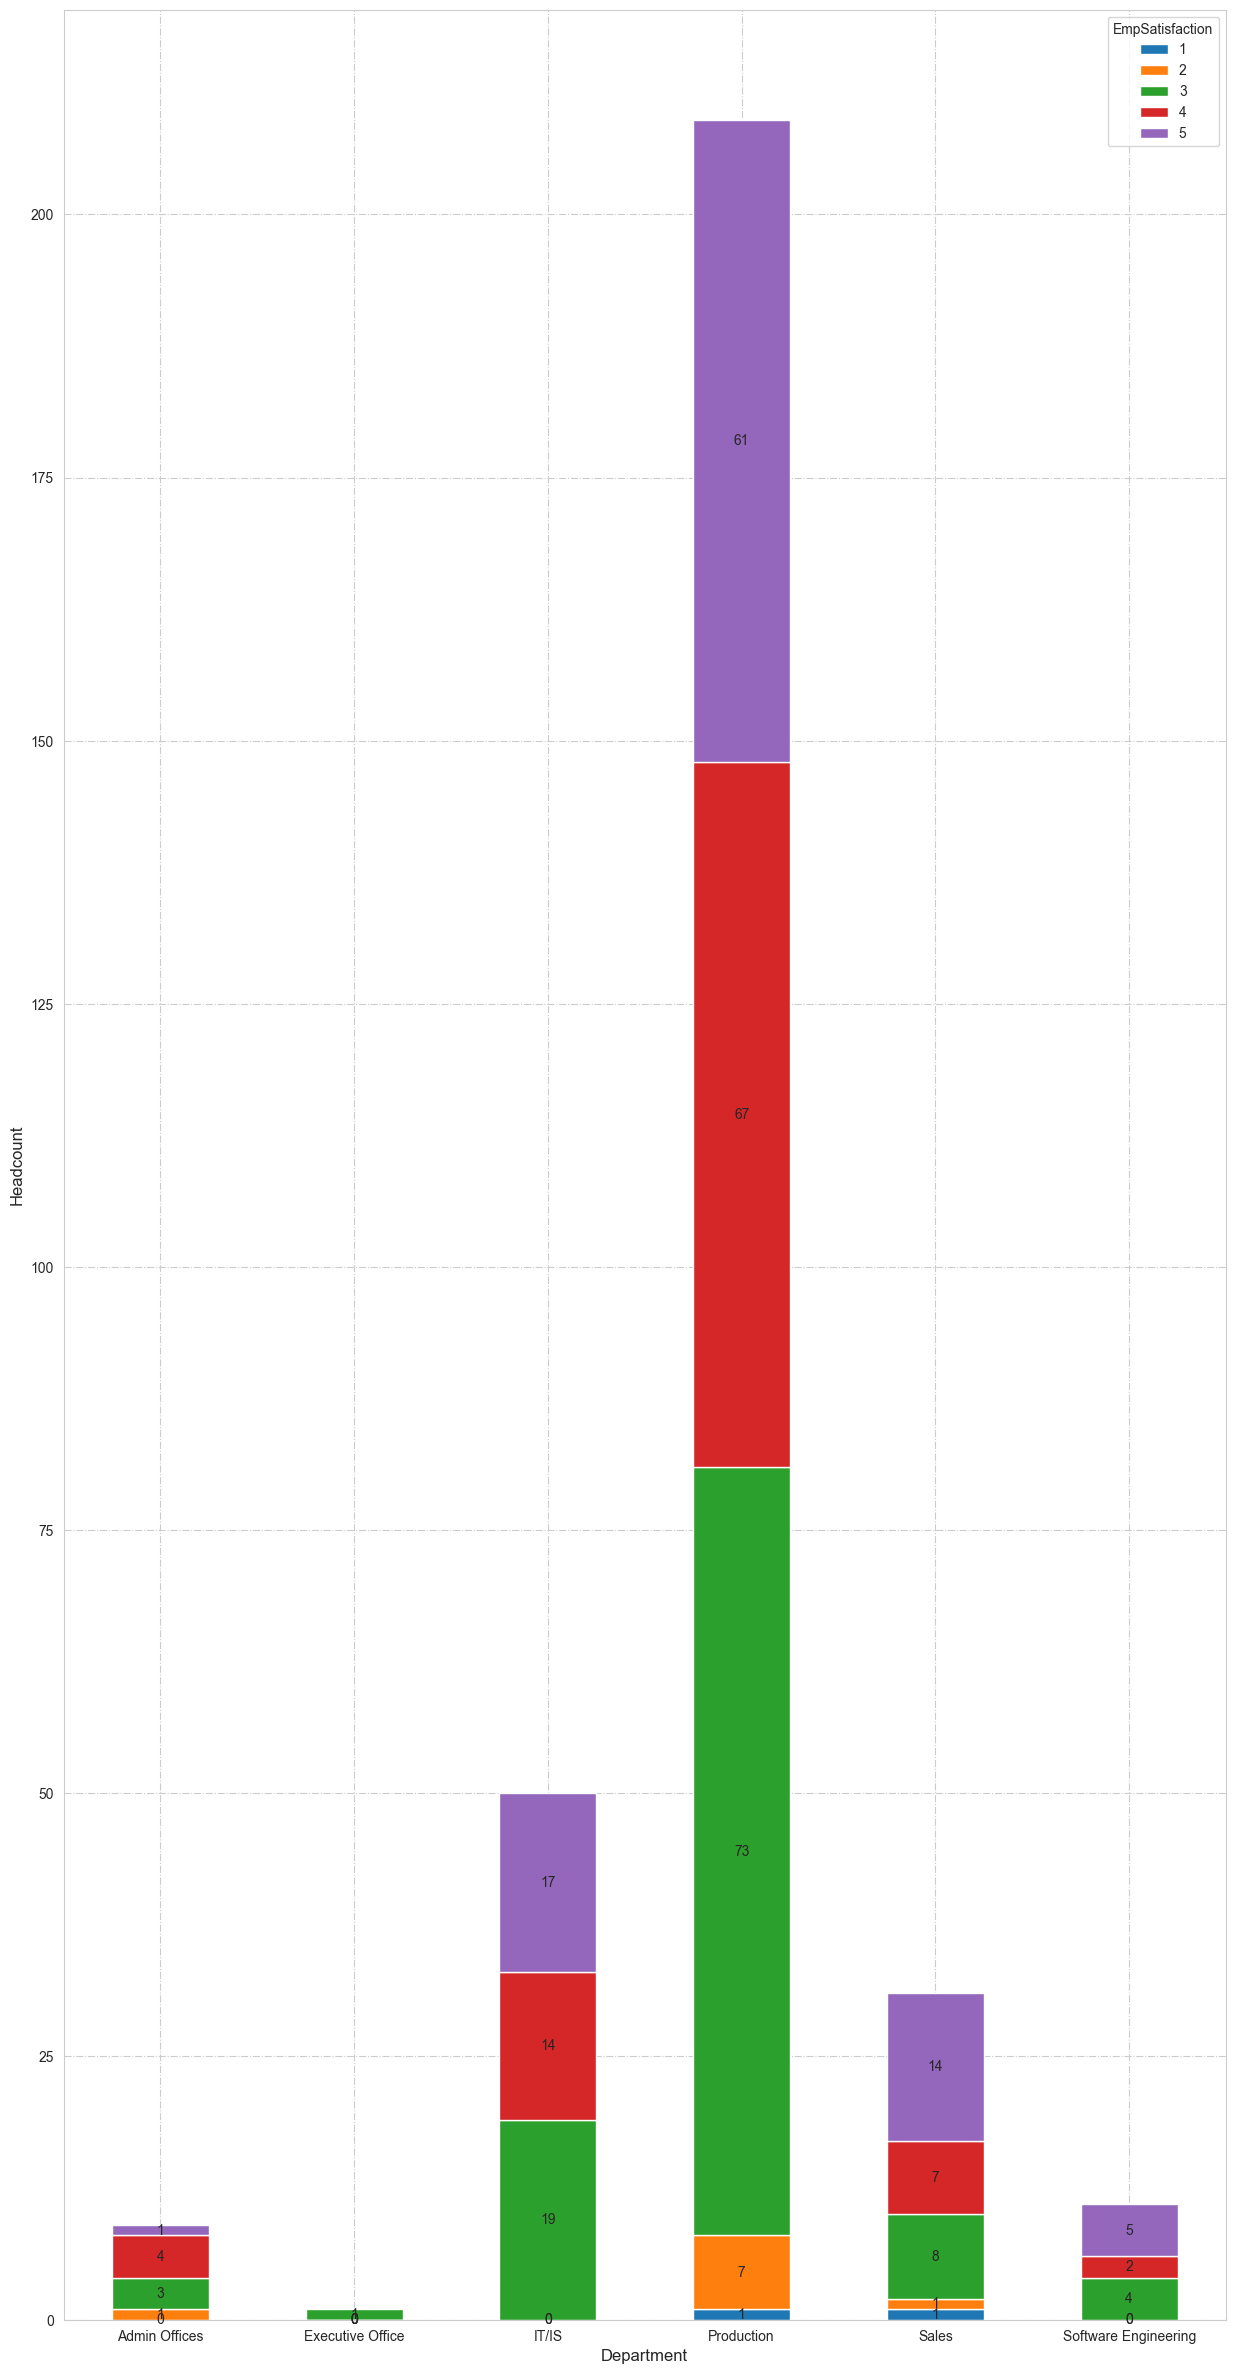

In [78]:
DepartmentvsEmpSatisfaction = pd.crosstab(df.Department, df.EmpSatisfaction)

#Plotting a bar chart.
ax = DepartmentvsEmpSatisfaction.plot(kind='bar',figsize=(15,30),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
    ax.set_xlabel("Department", fontsize=12)
    ax.set_ylabel("Headcount", fontsize=12)
    

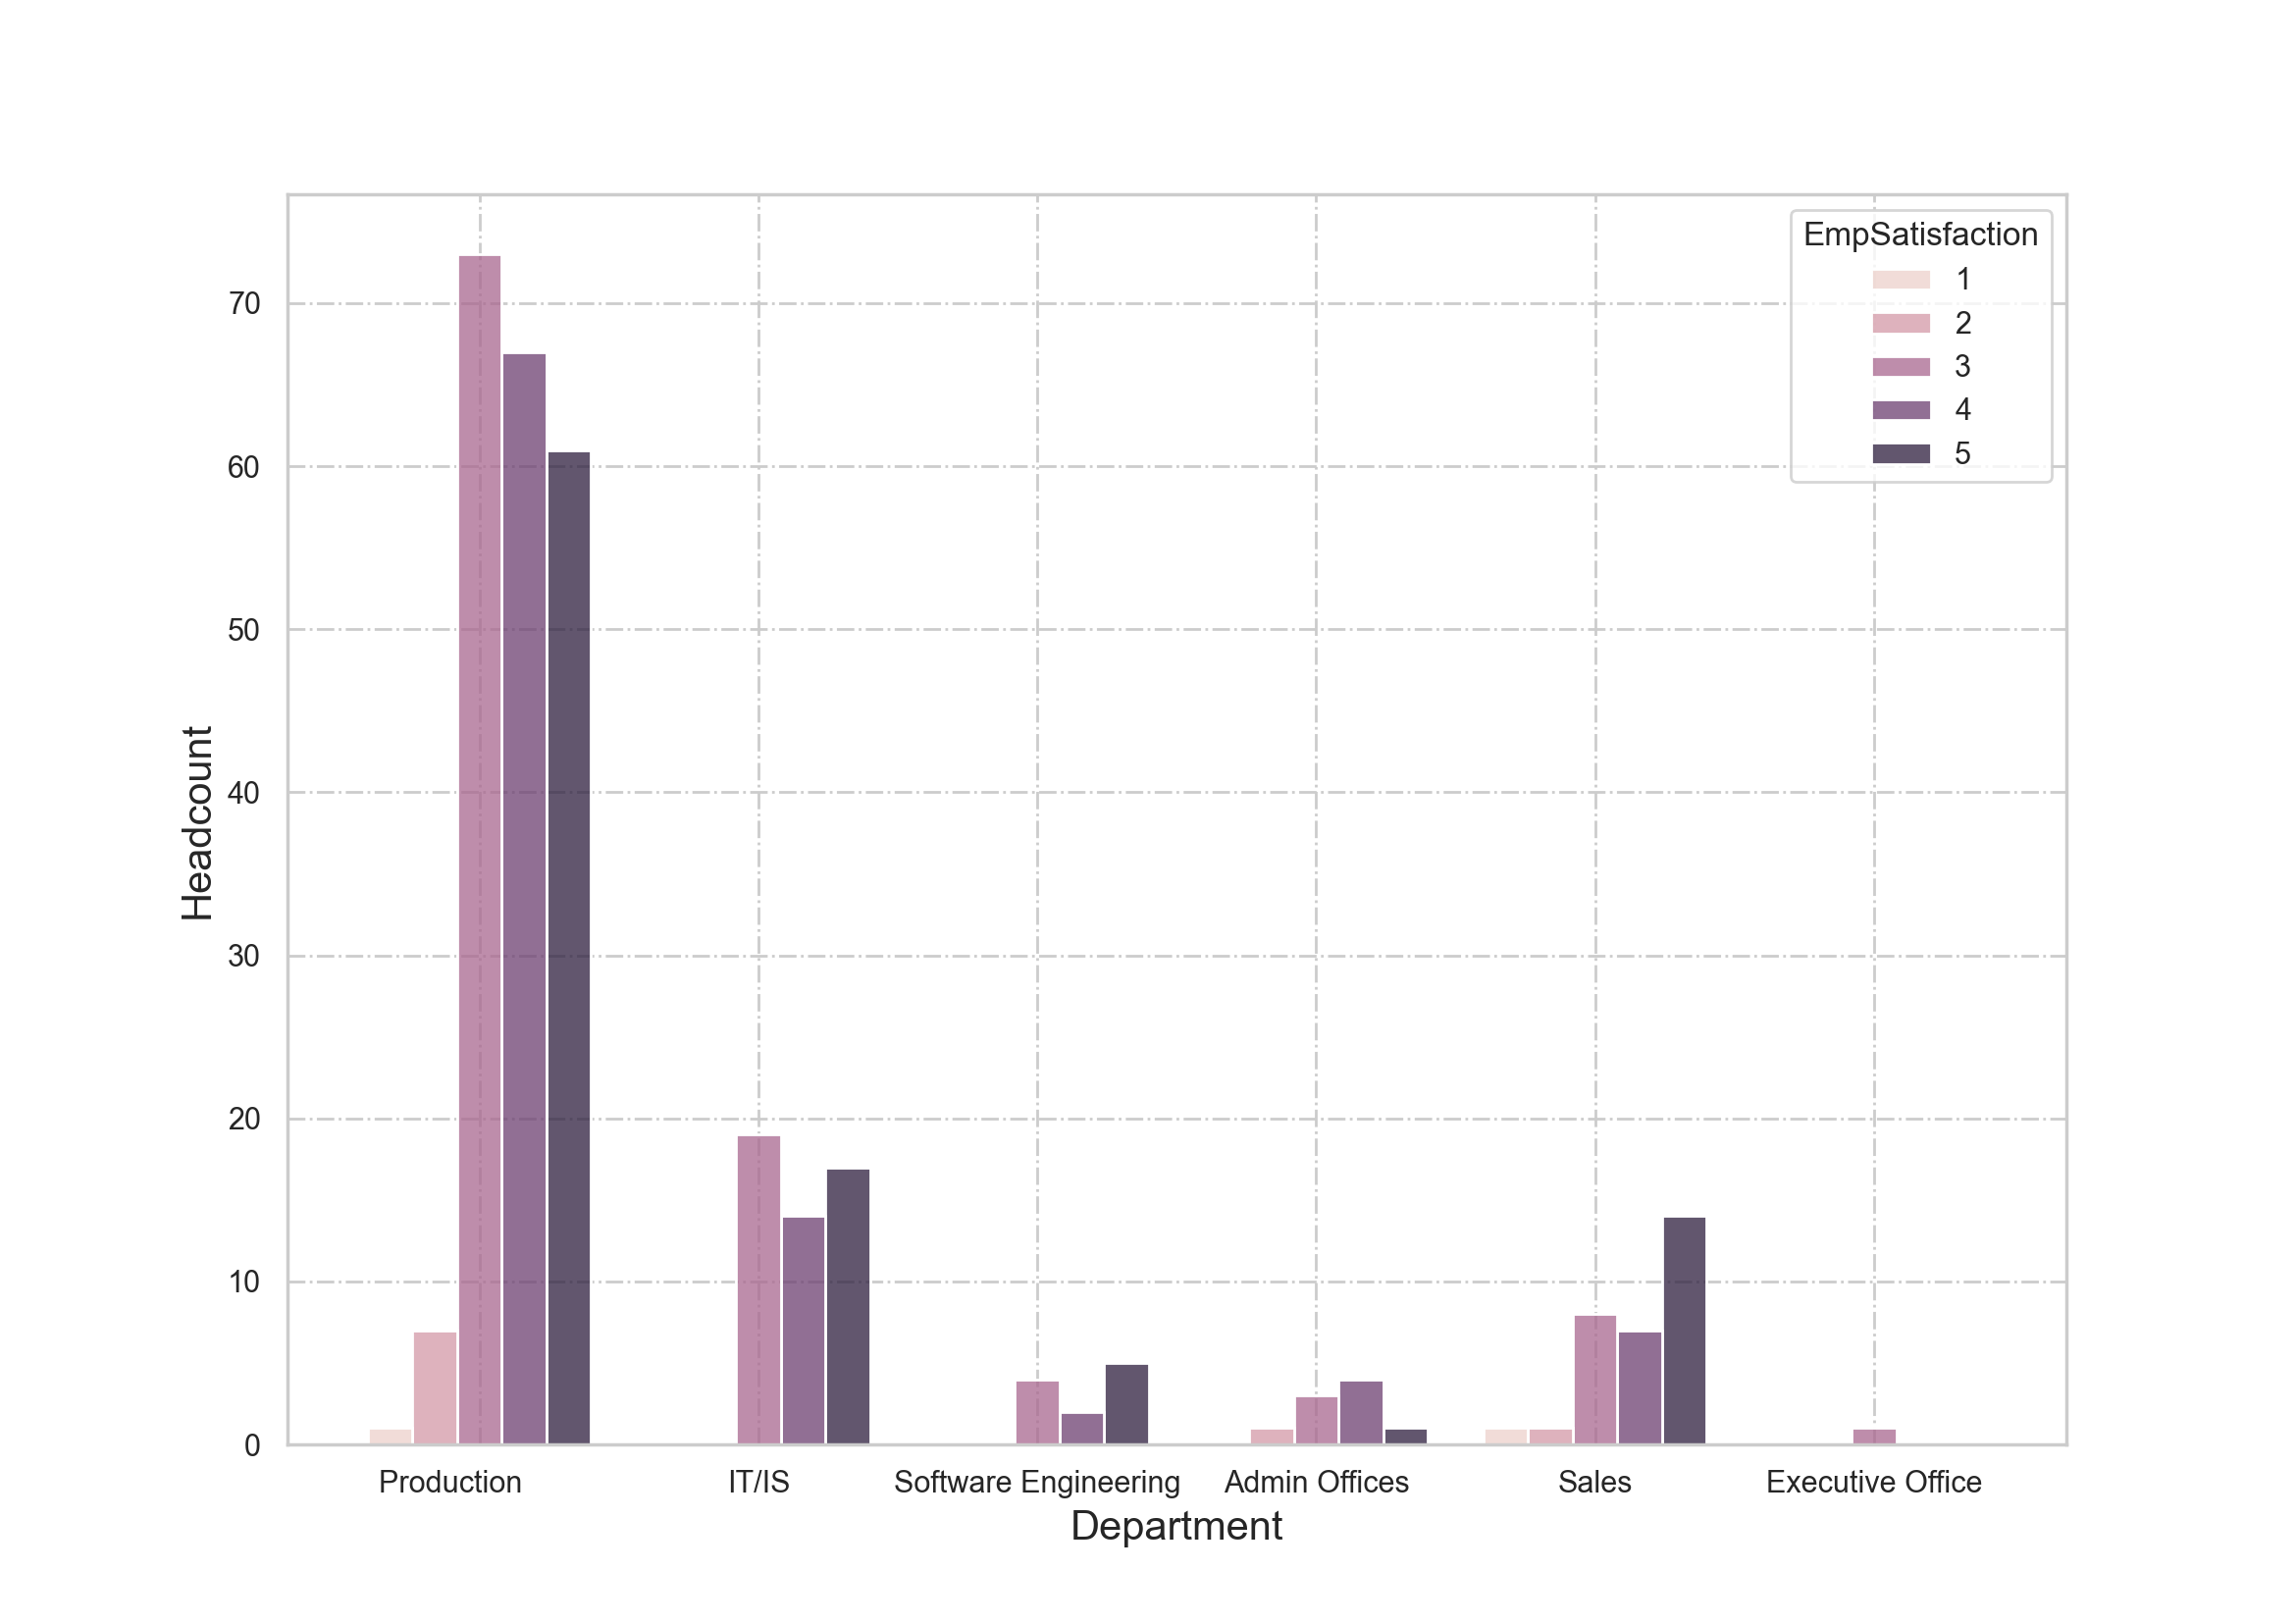

In [267]:
fig= sns.histplot(data=df, x="Department",hue="EmpSatisfaction", multiple="dodge", shrink=.8) 
fig.set_xlabel("Department", fontsize=15)
fig.set_ylabel("Headcount", fontsize=15)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})


### Number of employees by departments

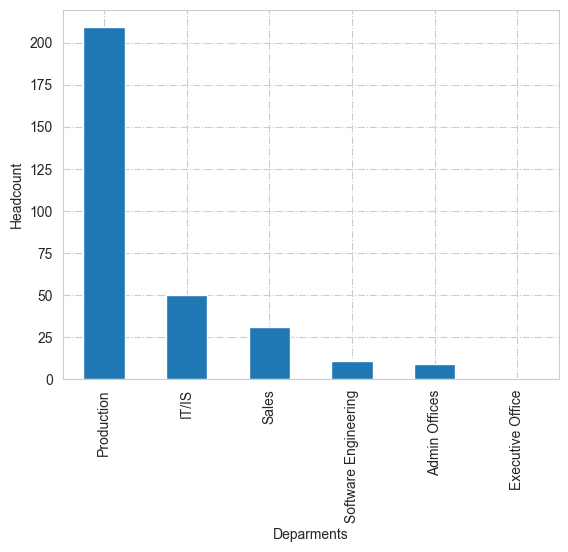

In [79]:
df.Department.value_counts().plot(kind="bar")
plt.xlabel('Deparments')
plt.ylabel('Headcount')

plt.show()

In [80]:
df.Department.value_counts()

Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64

In [81]:
df.Department.unique()

array(['Production', 'IT/IS', 'Software Engineering', 'Admin Offices',
       'Sales', 'Executive Office'], dtype=object)

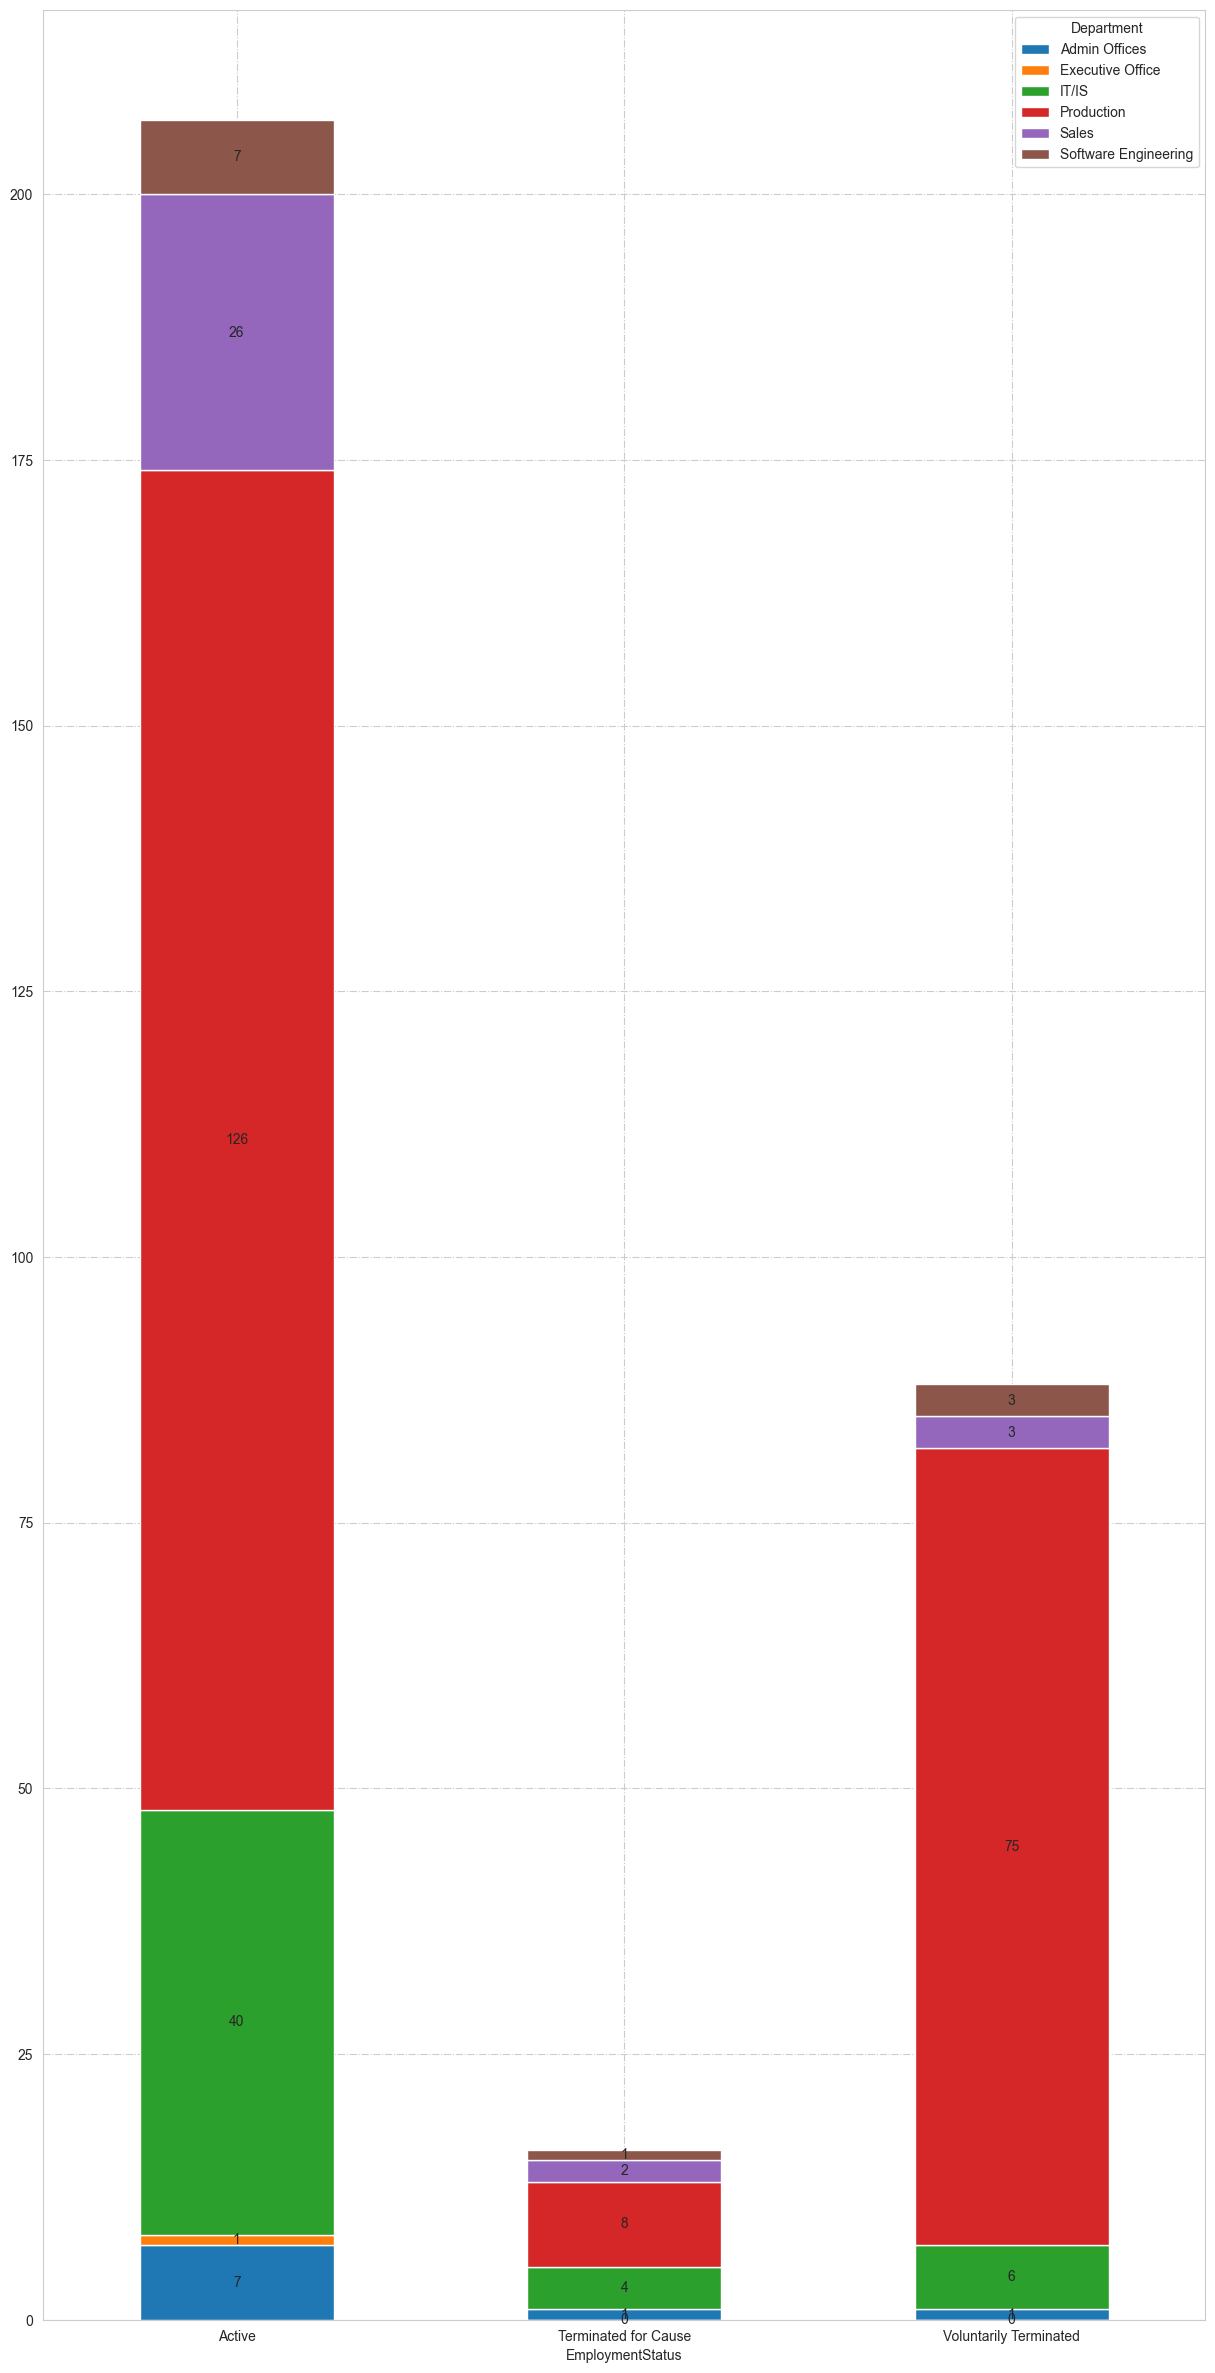

In [82]:
EmploymentStatusvsDepartment = pd.crosstab(df.EmploymentStatus, df.Department)

#Plotting a bar chart.
ax = EmploymentStatusvsDepartment.plot(kind='bar',figsize=(15,30),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

### About the recruitment source 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


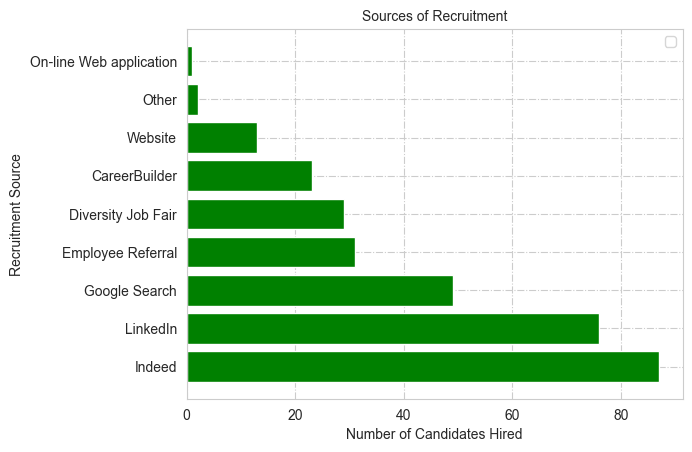

In [85]:
l=df['RecruitmentSource'].value_counts()

plt.barh(l.index, l ,color='g')
plt.title("Sources of Recruitment",fontsize=10)
plt.xlabel('Number of Candidates Hired')
plt.ylabel('Recruitment Source')
plt.legend()
plt.show()

### About the Employment Status

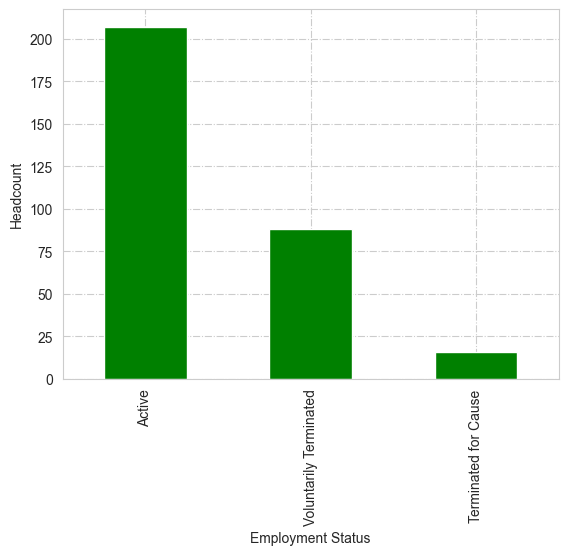

In [86]:
df.EmploymentStatus.value_counts().plot(kind="bar", color = 'green')
plt.xlabel('Employment Status')
plt.ylabel('Headcount')
plt.show()

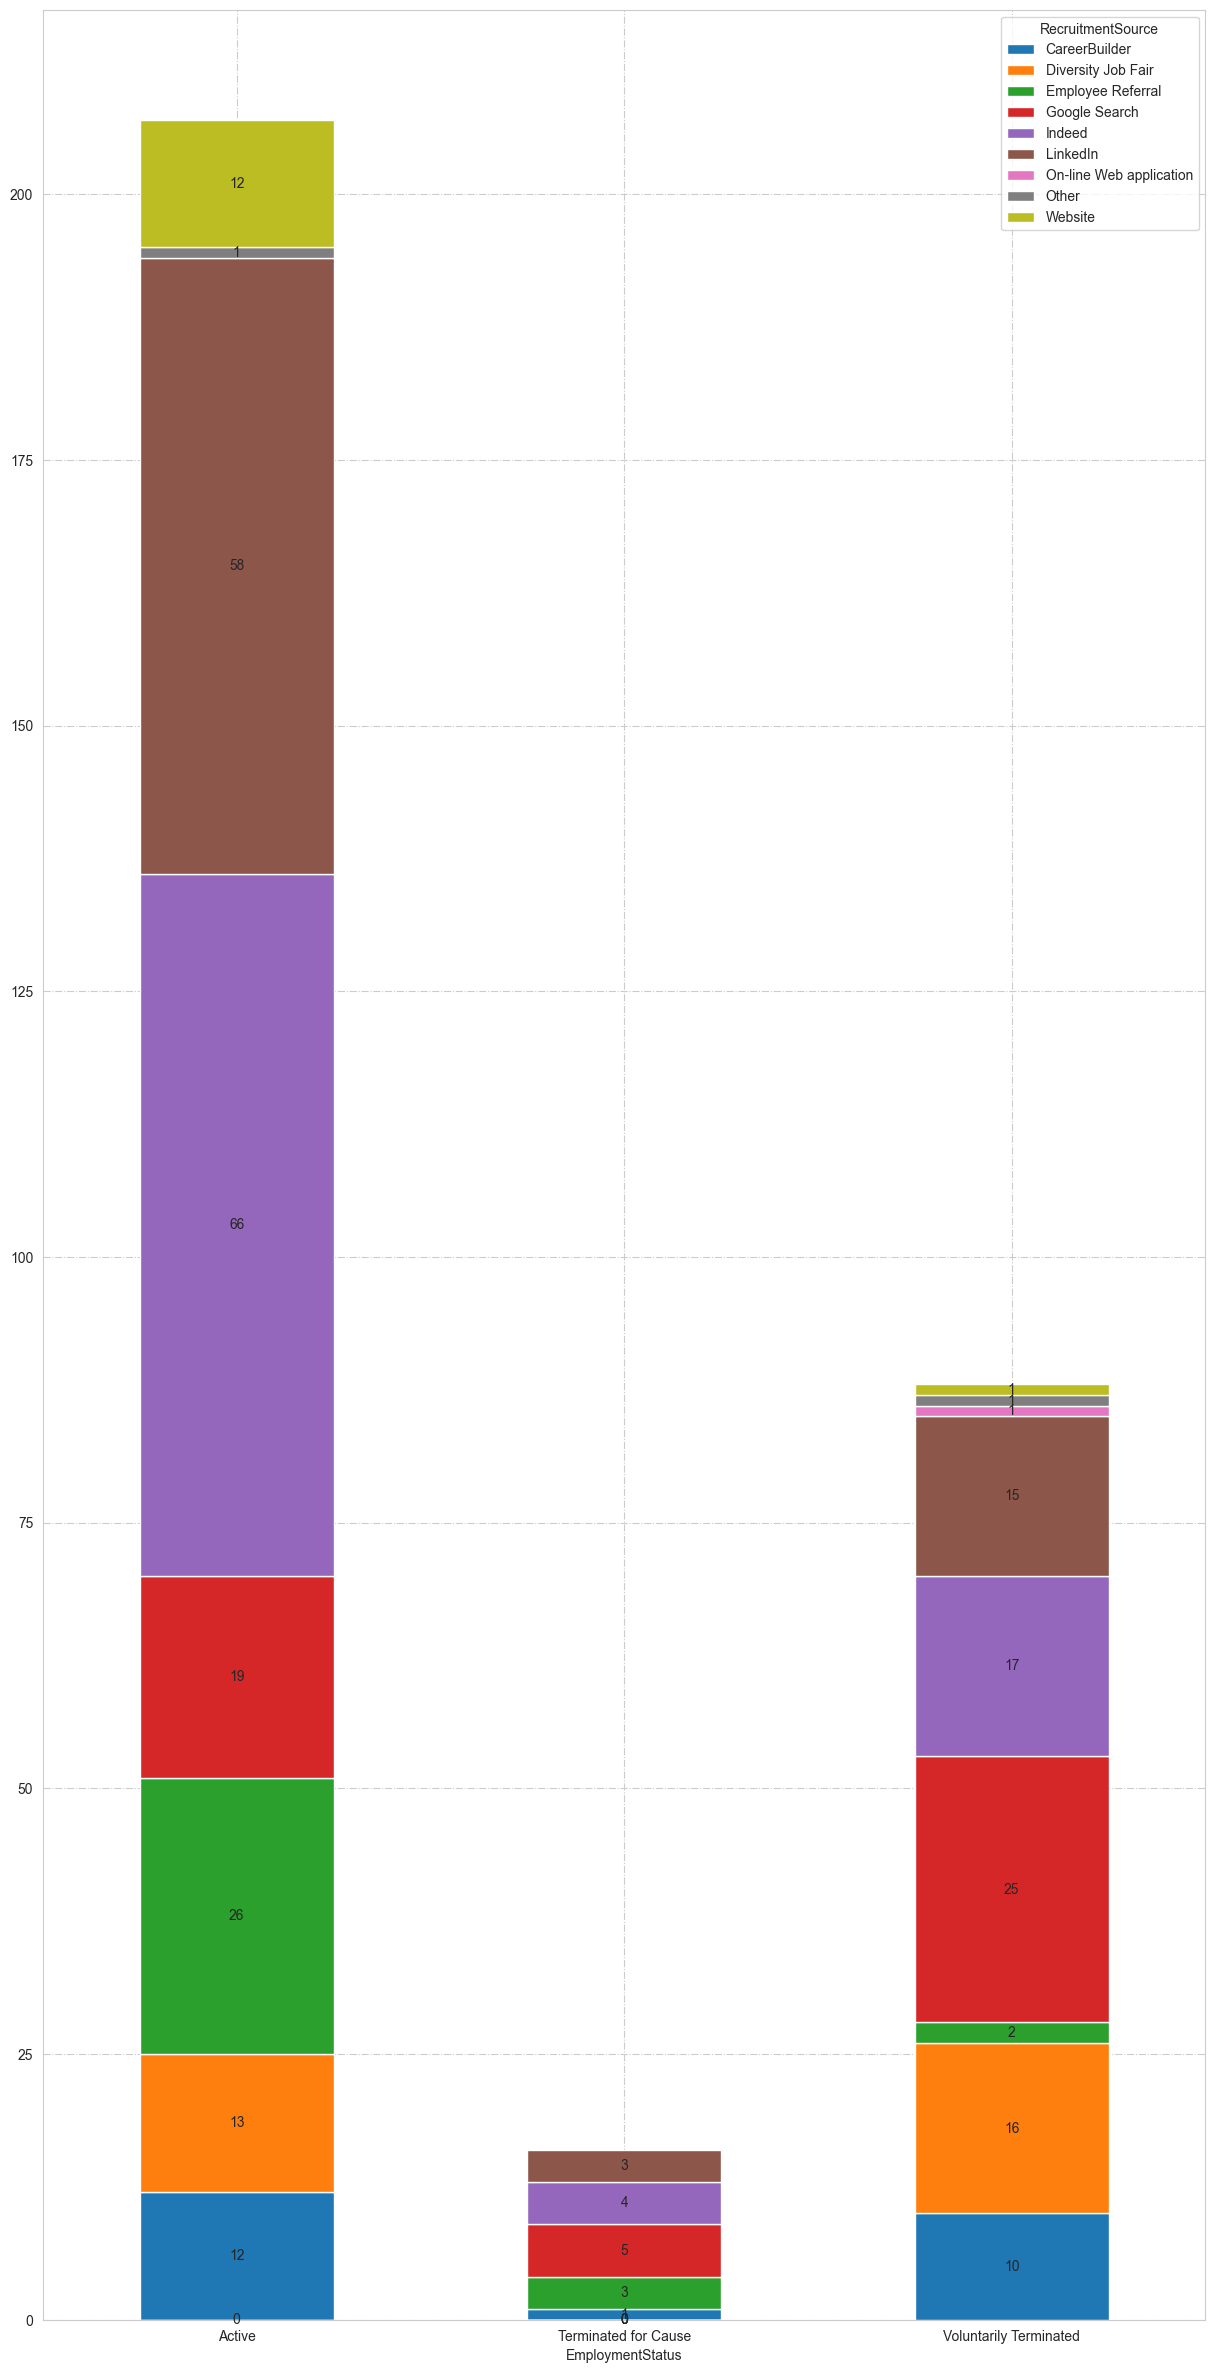

In [87]:
EmploymentStatusvsRecruitmentScore = pd.crosstab(df.EmploymentStatus, df.RecruitmentSource)

#Plotting a bar chart.
ax = EmploymentStatusvsRecruitmentScore.plot(kind='bar',figsize=(15,30),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

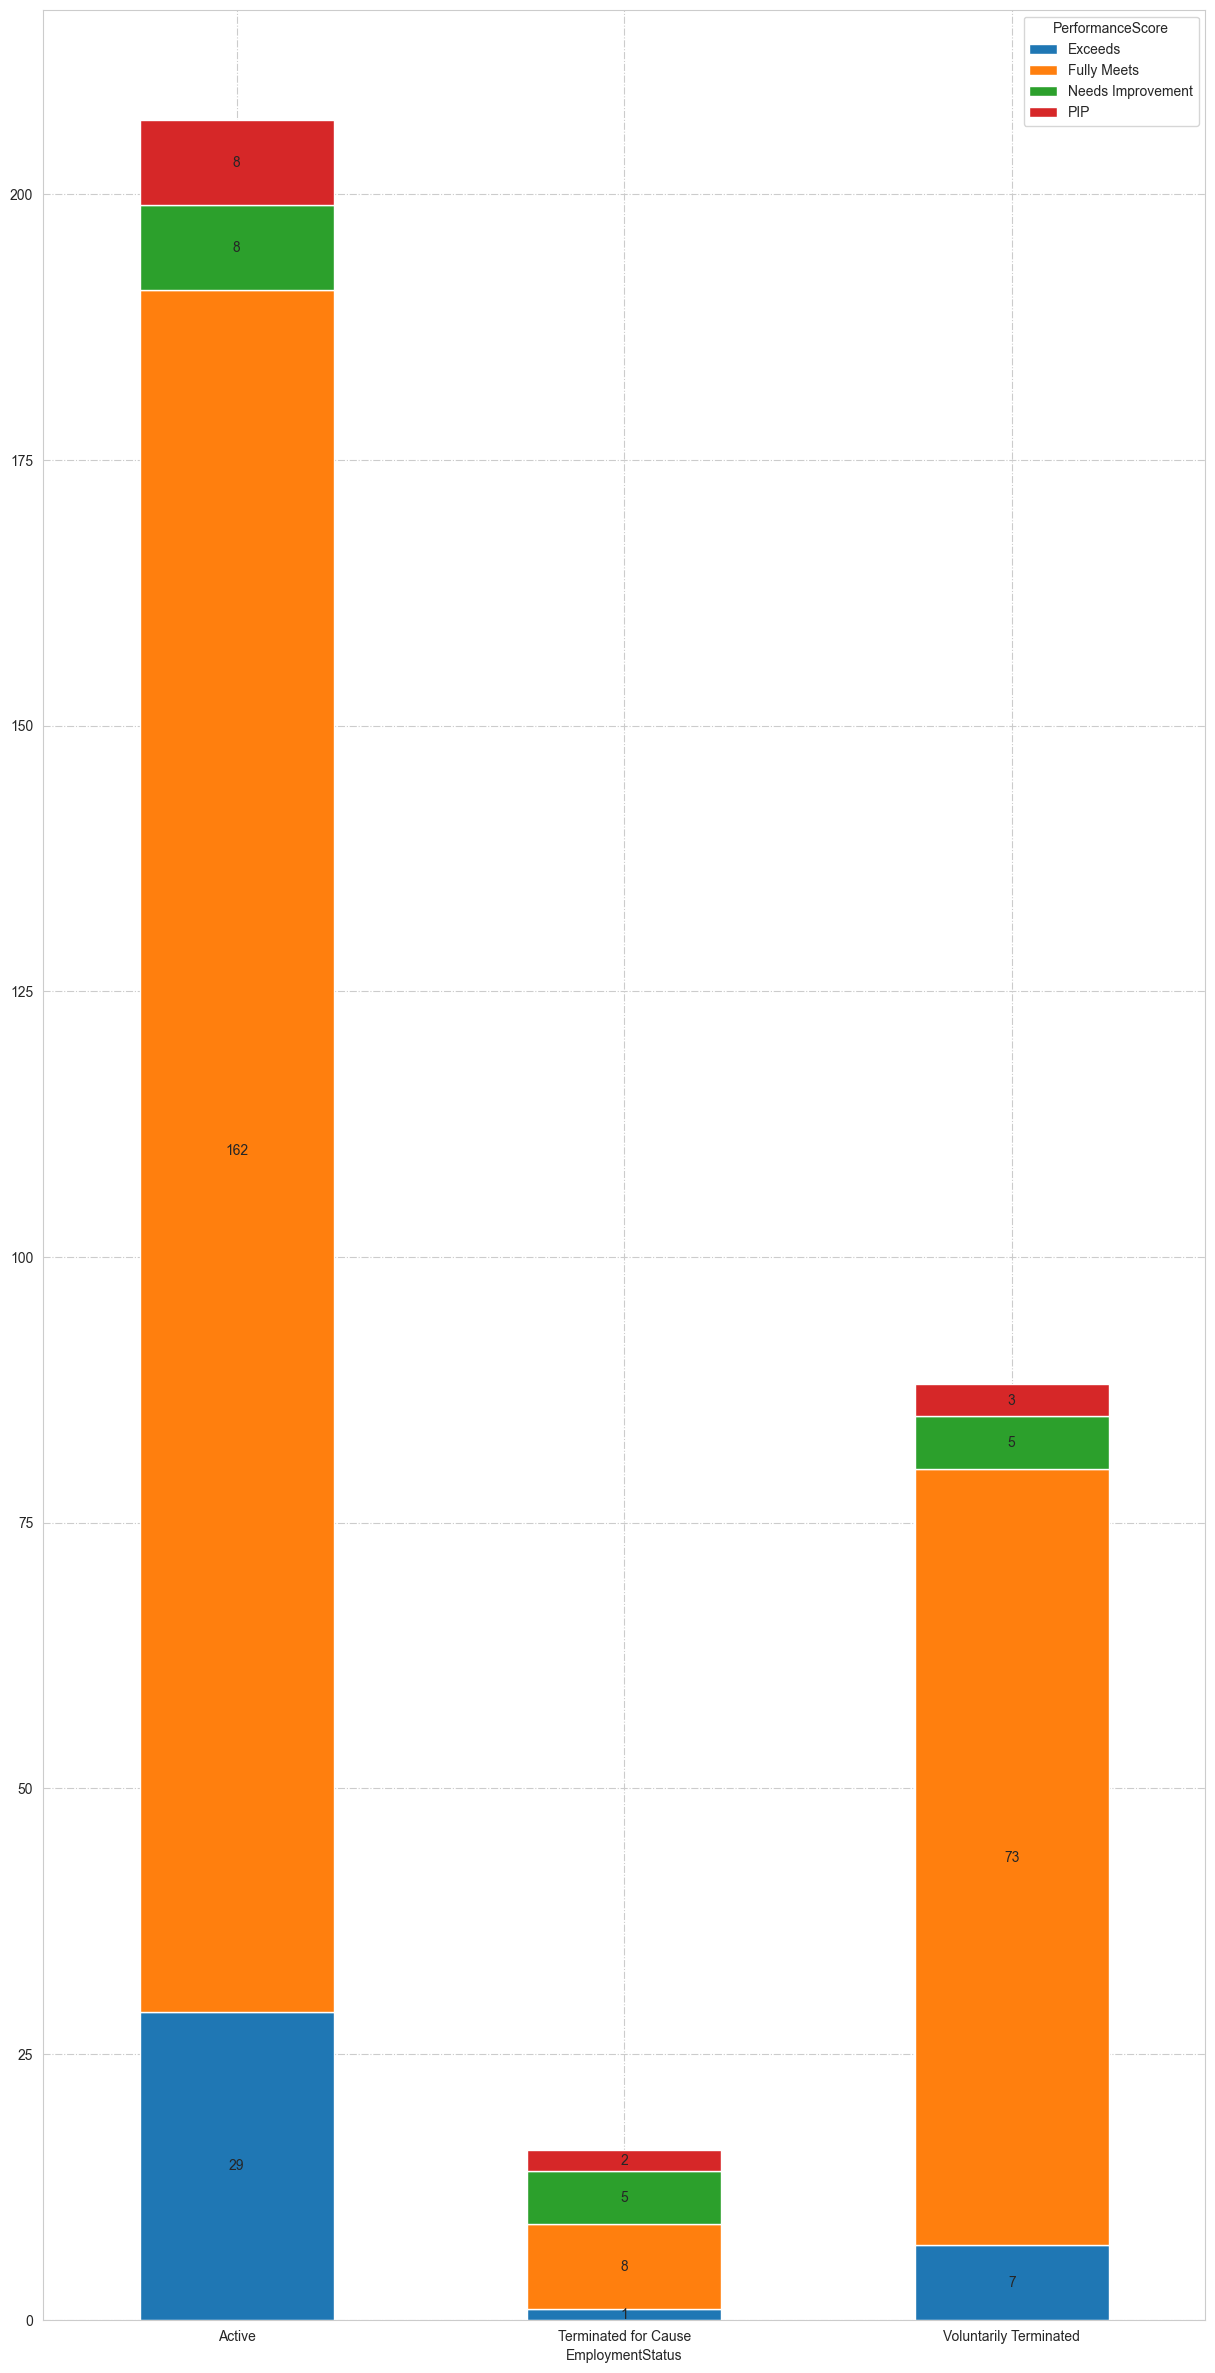

In [88]:
EmploymentStatusvsPerformanceScore = pd.crosstab(df.EmploymentStatus, df.PerformanceScore)

#Plotting a bar chart.
ax = EmploymentStatusvsPerformanceScore.plot(kind='bar',figsize=(15,30),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center') 

### Top 10 Highest VS lowest salaries 

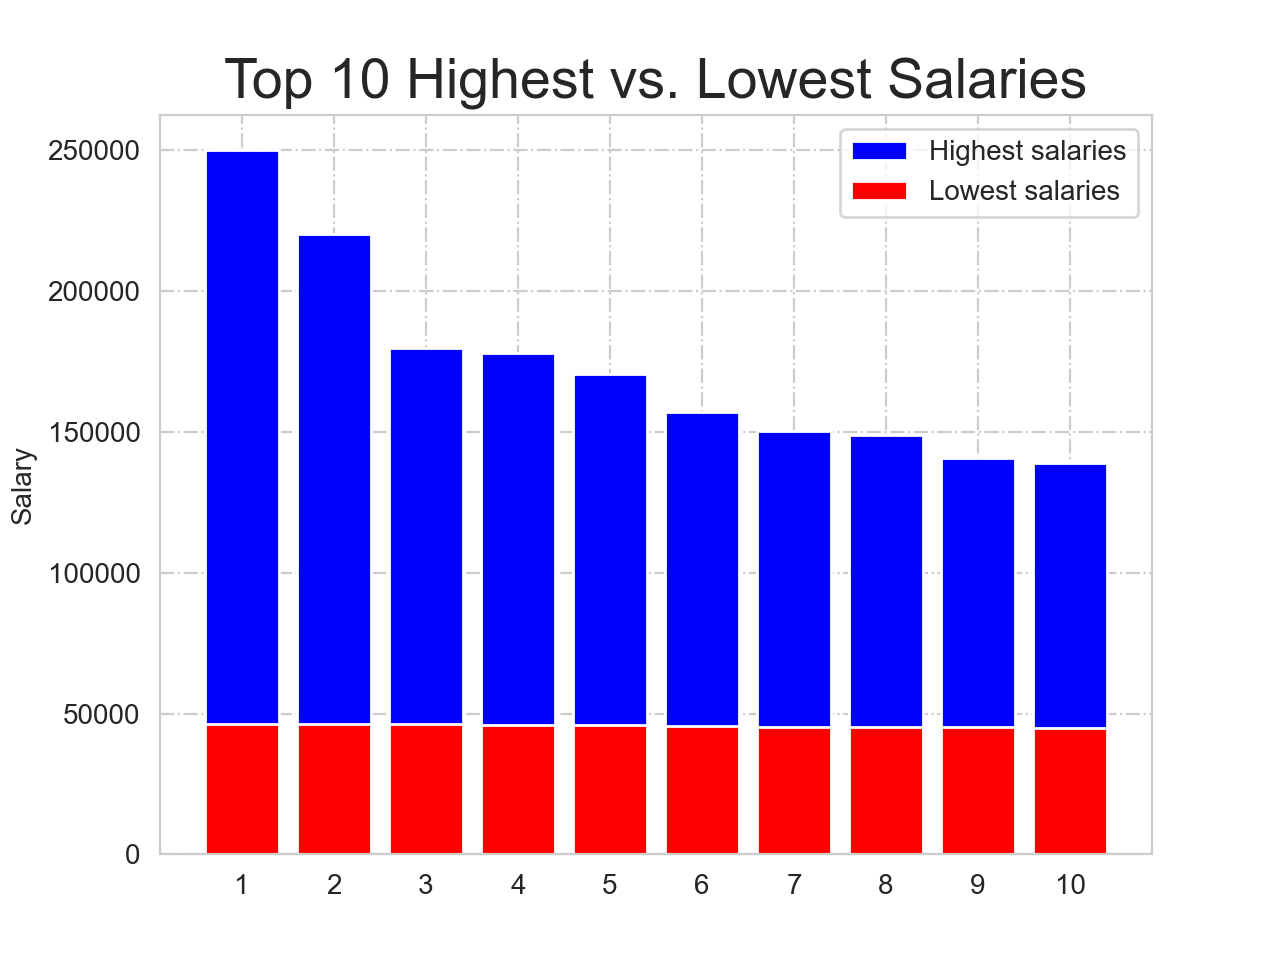

In [184]:
c=[1,2,3,4,5,6,7,8,9,10]
x= df['Salary'].sort_values(ascending=False).head(10)
y= df['Salary'].sort_values(ascending=False).tail(10)

plt.bar(c,x,color='b',label="Highest salaries")
plt.bar(c,y,color='r',label="Lowest salaries")

plt.title("Top 10 Highest vs. Lowest Salaries",fontsize=20)

plt.xticks(c)
plt.ylabel('Salary')
plt.legend()
plt.show()

### About the number of absences

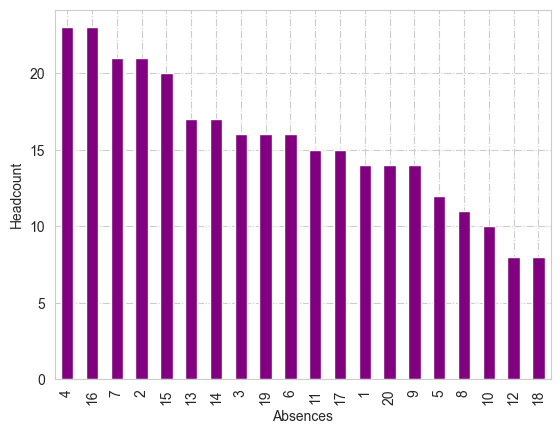

In [90]:
df.Absences.value_counts().plot(kind="bar", color = 'purple')
plt.xlabel('Absences')
plt.ylabel('Headcount')

plt.show()

In [92]:
DayAbs = df.groupby(['Department'])['Absences'].sum()
NbEmp = df.groupby(['Department'])['EmpID'].count()

EmpAbs = pd.merge(right=df.groupby(['Department'])[['EmpID']].count().reset_index(), left=df.groupby(['Department'])[['Absences']].sum().reset_index(), on='Department', how="outer")

EmpAbs['AbsRatio'] = round(EmpAbs['Absences']/EmpAbs['EmpID'], 2)



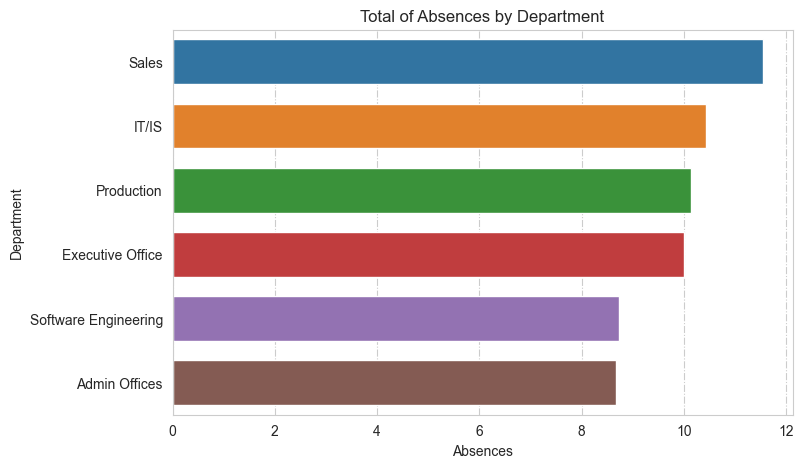

In [93]:
EmpAbs.sort_values(by=['AbsRatio'], ascending=False, inplace=True)
plt.figure(figsize=(8, 5))
sns.barplot(EmpAbs, x='AbsRatio', y='Department', width=0.7, orient='h')
plt.title("Total of Absences by Department")
plt.xlabel('Absences');

In [95]:
EmpAbs.value_counts()

Department            Absences  EmpID  AbsRatio
Admin Offices         78        9      8.67        1
Executive Office      10        1      10.00       1
IT/IS                 522       50     10.44       1
Production            2120      209    10.14       1
Sales                 358       31     11.55       1
Software Engineering  96        11     8.73        1
Name: count, dtype: int64

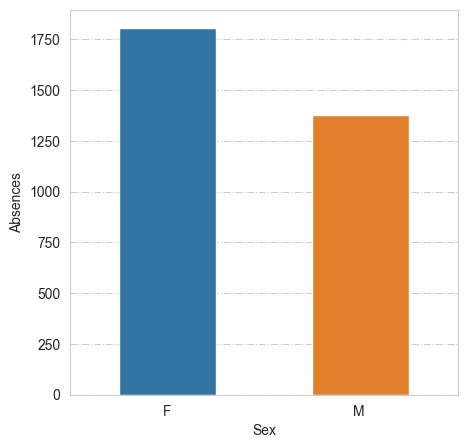

In [96]:
AbsPrSex = df.groupby(['Sex'])[['Absences']].sum().reset_index()
plt.figure(figsize=(5, 5))
sns.barplot(AbsPrSex, x='Sex', y='Absences', width=0.5);



In [97]:
AbsPrSex

,Sex,Absences
0,F,1806
1,M,1378


### Performance Score

In [98]:
df.PerformanceScore.value_counts()

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

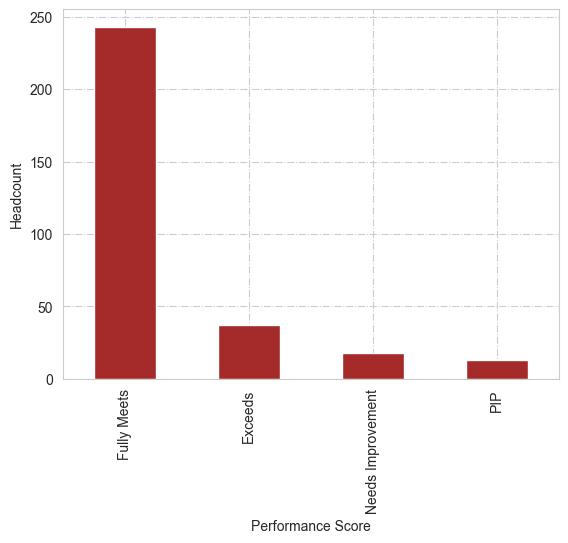

In [99]:
df.PerformanceScore.value_counts().plot(kind="bar", color = 'brown')
plt.xlabel('Performance Score')
plt.ylabel('Headcount')

plt.show()

In [100]:
df2=df['PerformanceScore'].value_counts()
df2

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


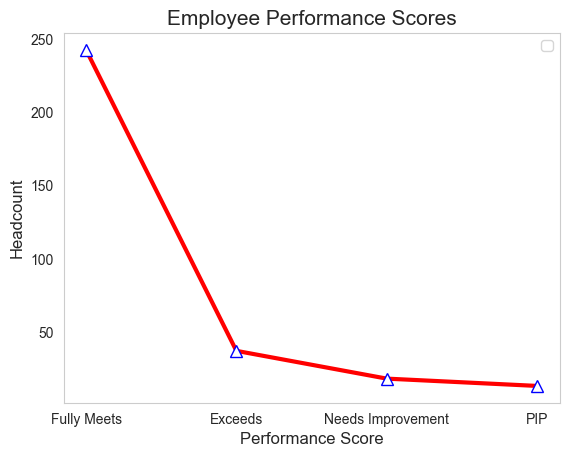

In [102]:
plt.plot(df2,'r^-',linewidth=3,ms=9,mfc='w',mec='b')

plt.title('Employee Performance Scores',fontsize=15)
plt.xlabel("Performance Score",fontsize=12)
plt.ylabel("Headcount",fontsize=12)
plt.grid()

plt.legend()
plt.show()

In [103]:
df.Department.unique()

array(['Production', 'IT/IS', 'Software Engineering', 'Admin Offices',
       'Sales', 'Executive Office'], dtype=object)

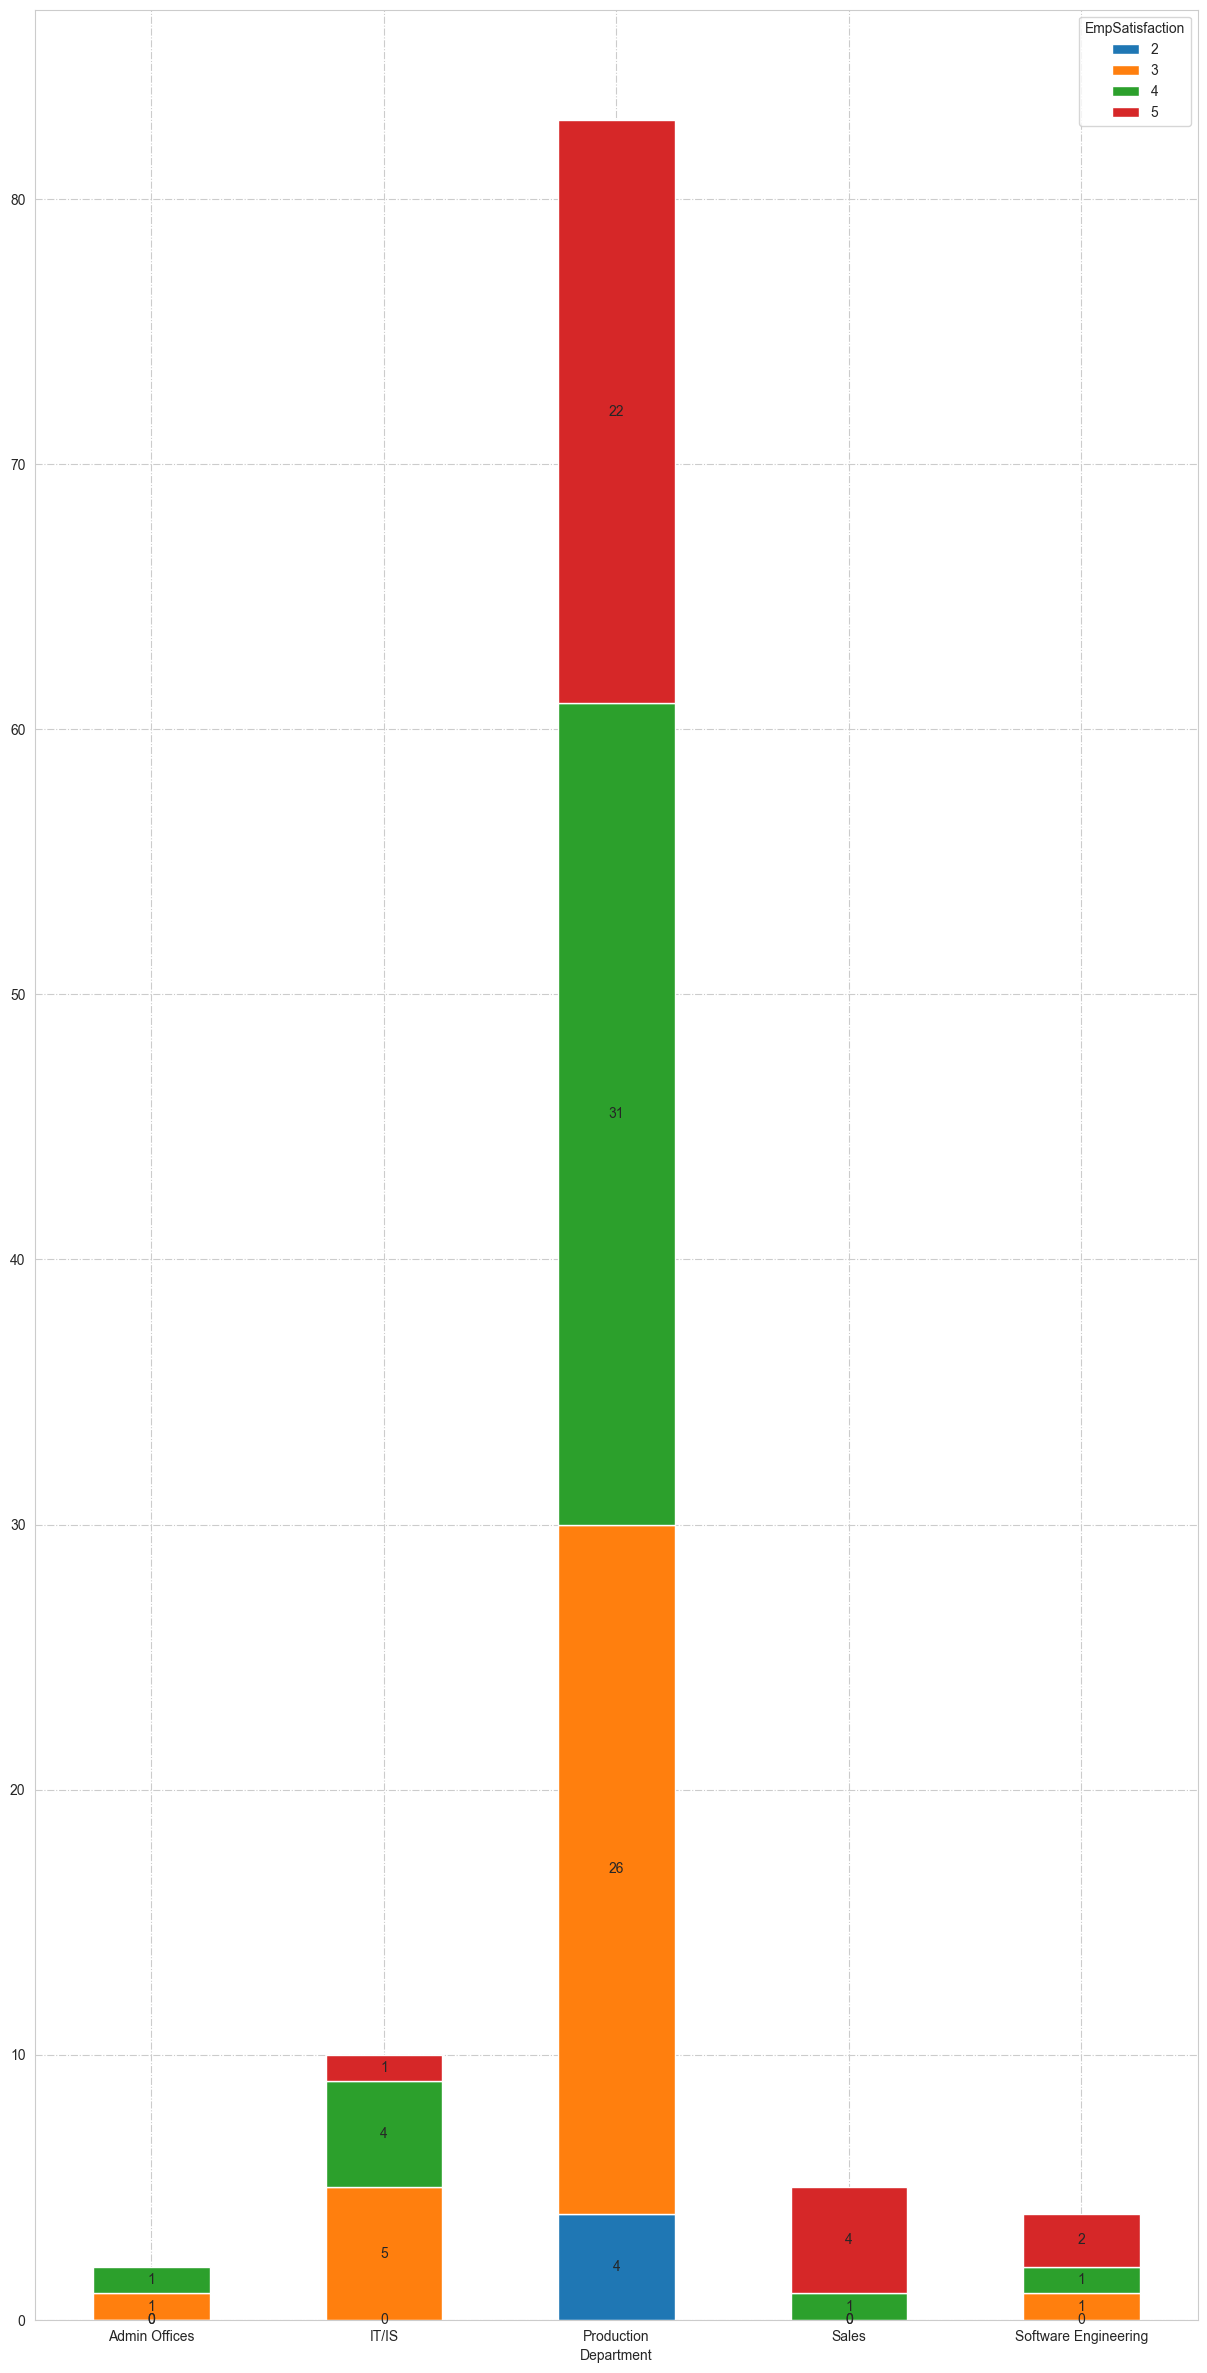

In [104]:
DepartmentvsEmpSatisfaction = pd.crosstab(df1.Department, df1.EmpSatisfaction)

#Plotting a bar chart.
ax = DepartmentvsEmpSatisfaction.plot(kind='bar',figsize=(15,30),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
    

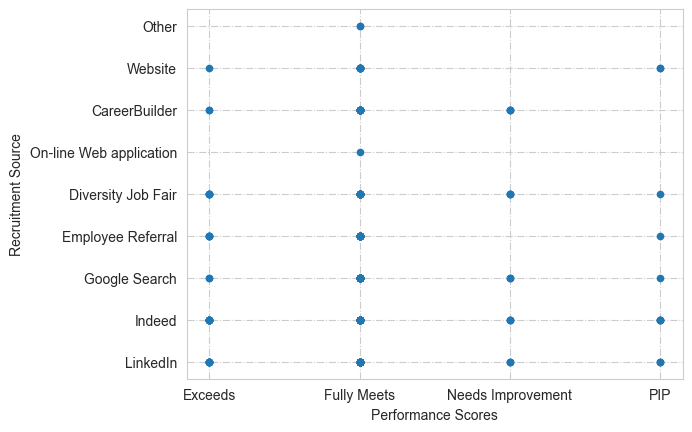

In [109]:
df.plot.scatter(y="RecruitmentSource",x="PerformanceScore")

plt.xlabel('Performance Scores');
plt.ylabel('Recruitment Source');

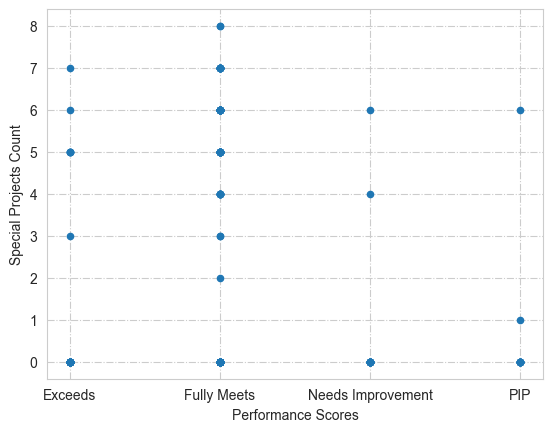

In [110]:
df.plot.scatter(y="SpecialProjectsCount",x="PerformanceScore")
plt.xlabel('Performance Scores');
plt.ylabel('Special Projects Count');

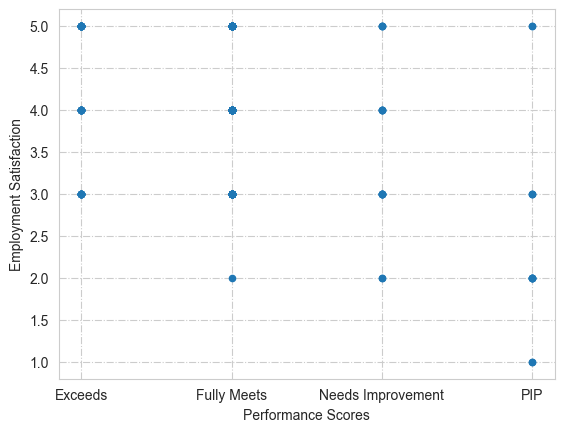

In [111]:
df.plot.scatter(y="EmpSatisfaction",x="PerformanceScore")
plt.xlabel('Performance Scores');
plt.ylabel('Employment Satisfaction');

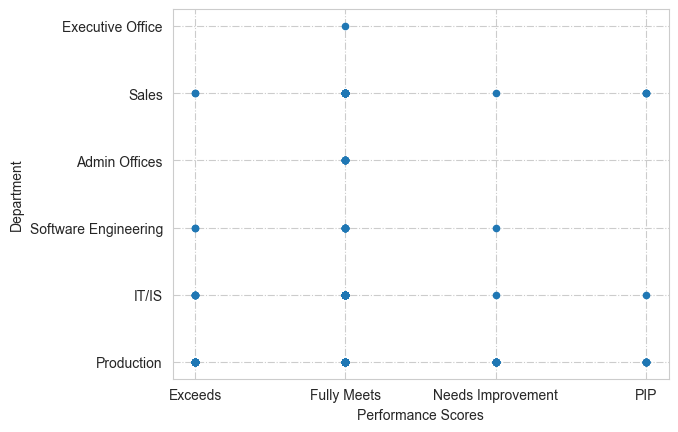

In [112]:
df.plot.scatter(y="Department",x="PerformanceScore")
plt.xlabel('Performance Scores');
plt.ylabel('Department');

### About the employees by age

In [131]:
fig = px.bar(df_active.groupby('Age').Age.count(),
             color=df_active.groupby('Age').Age.count(), 
             text=df_active.groupby('Age').Age.count(),
             title='Number of Active Employees by Age',
             labels={'color':'number of<br>employees',
                     'value':'Headcount', 
                     'index': 'age'})

fig.update_traces(textfont_size=10, textangle=0, 
                  textposition='outside',
                  hovertemplate = 'age : %{x}<br>number of employees : %{y}') 

fig.update_layout(title_x=0.7, 
                  coloraxis_colorbar_thickness=15,
                  margin=dict(t=50, l=0, r=0, b=0))

fig

### About the Salary

C:\Users\ostab\AppData\Local\Temp\ipykernel_24028\3696954925.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



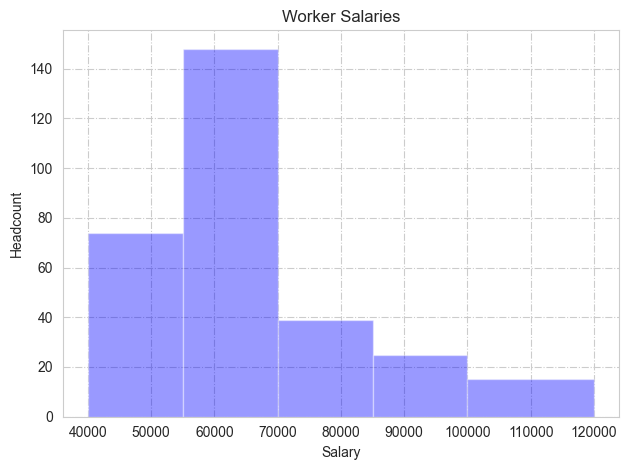

In [136]:
bins=[40000,55000,70000,85000,100000,120000]
sns.distplot(df.Salary,bins=bins,color="blue",kde=False)
plt.title("Worker Salaries")
plt.xlabel("Salary")
plt.ylabel("Headcount")
plt.tight_layout()
plt.grid(True)
plt.show()

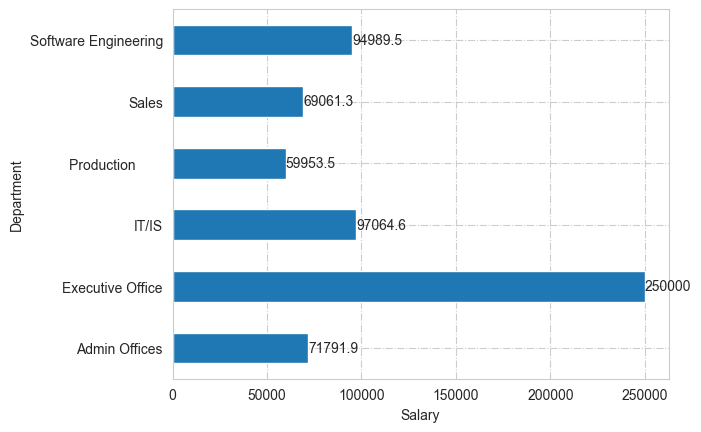

In [141]:
#What is the average of the salaries by departments? The below graph depicts that.
MeanOfSalaries = df.groupby('Department')['Salary'].mean()

ax1 = MeanOfSalaries.plot(kind = "barh")
for c in ax1.containers:
    ax1.bar_label(c,label_type = 'edge')
    plt.xlabel("Salary")
    plt.ylabel("Department")



    

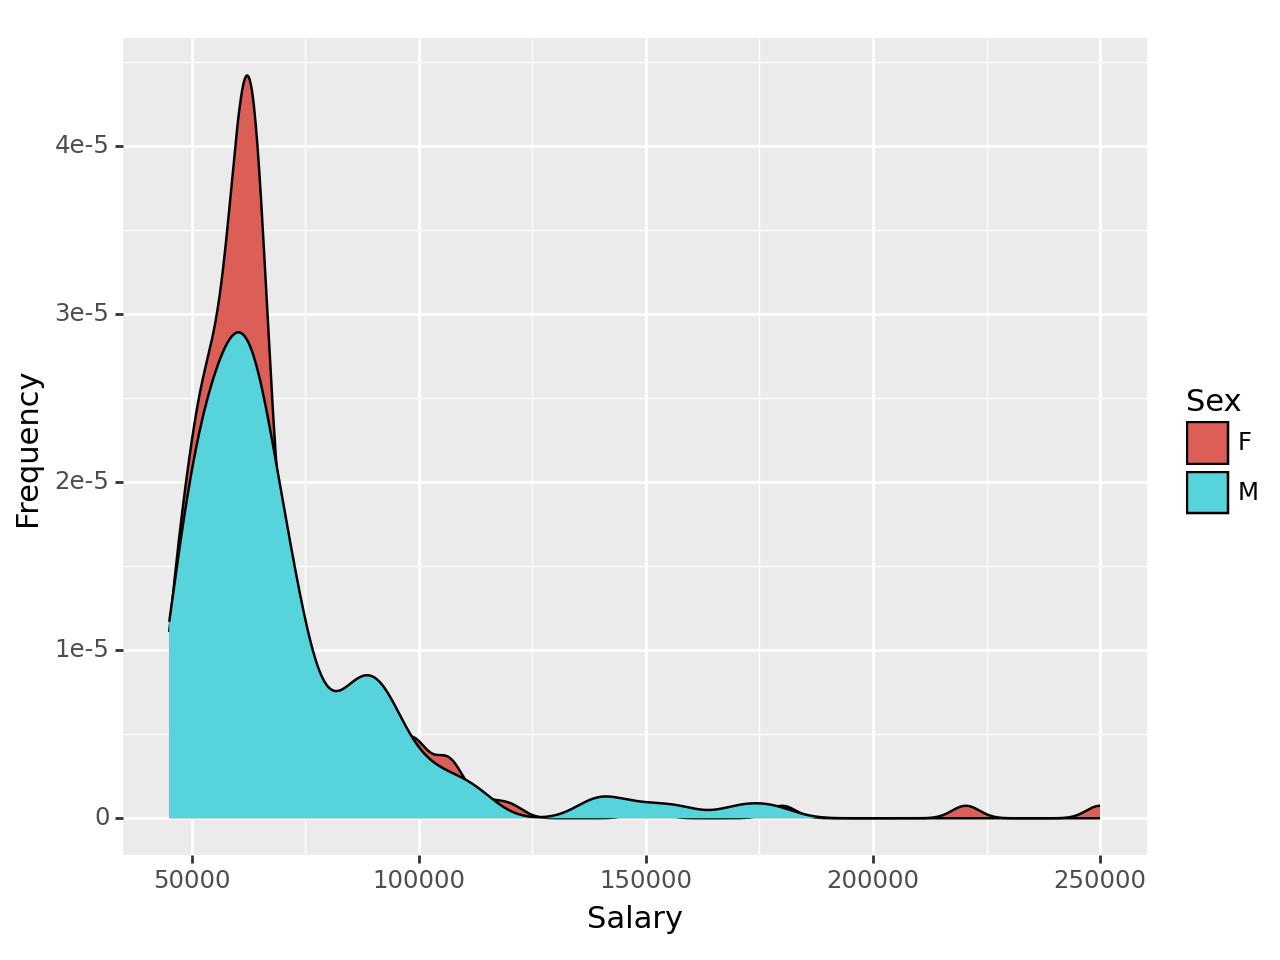

<Figure Size: (640 x 480)>

In [164]:
#Understanding the differences in pay by gender by plotting a bell curve. 
Male = df[df['Sex'] == "M"]
Female = df[df['Sex'] == "F"]
##Frequency
p= ggplot(data = df, mapping = aes(x = 'Salary', fill = 'Sex')) +  geom_density() + xlab("Salary") + ylab("Frequency")
p

From the above it is clear that Males are paid more than Female .

In [165]:
#Average salaries for Male and Female to find the unadjusted Pay gap for Males and Females. 

AvgSalariesBySex = df.groupby('Sex')['Salary'].mean()
print(AvgSalariesBySex)

unadjusted_pay_gap = 70629.4 - 67786.7
print("Unadjusted pay gap for Females is",unadjusted_pay_gap)

Sex
F     67786.727273
M     70629.400000
Name: Salary, dtype: float64
Unadjusted pay gap for Females is 2842.699999999997


This means the organization pays females $2843 less than men. However, this metric is unadjusted for various factors that are known to affect salary, including job level, tenure, previous work experience, and more. 

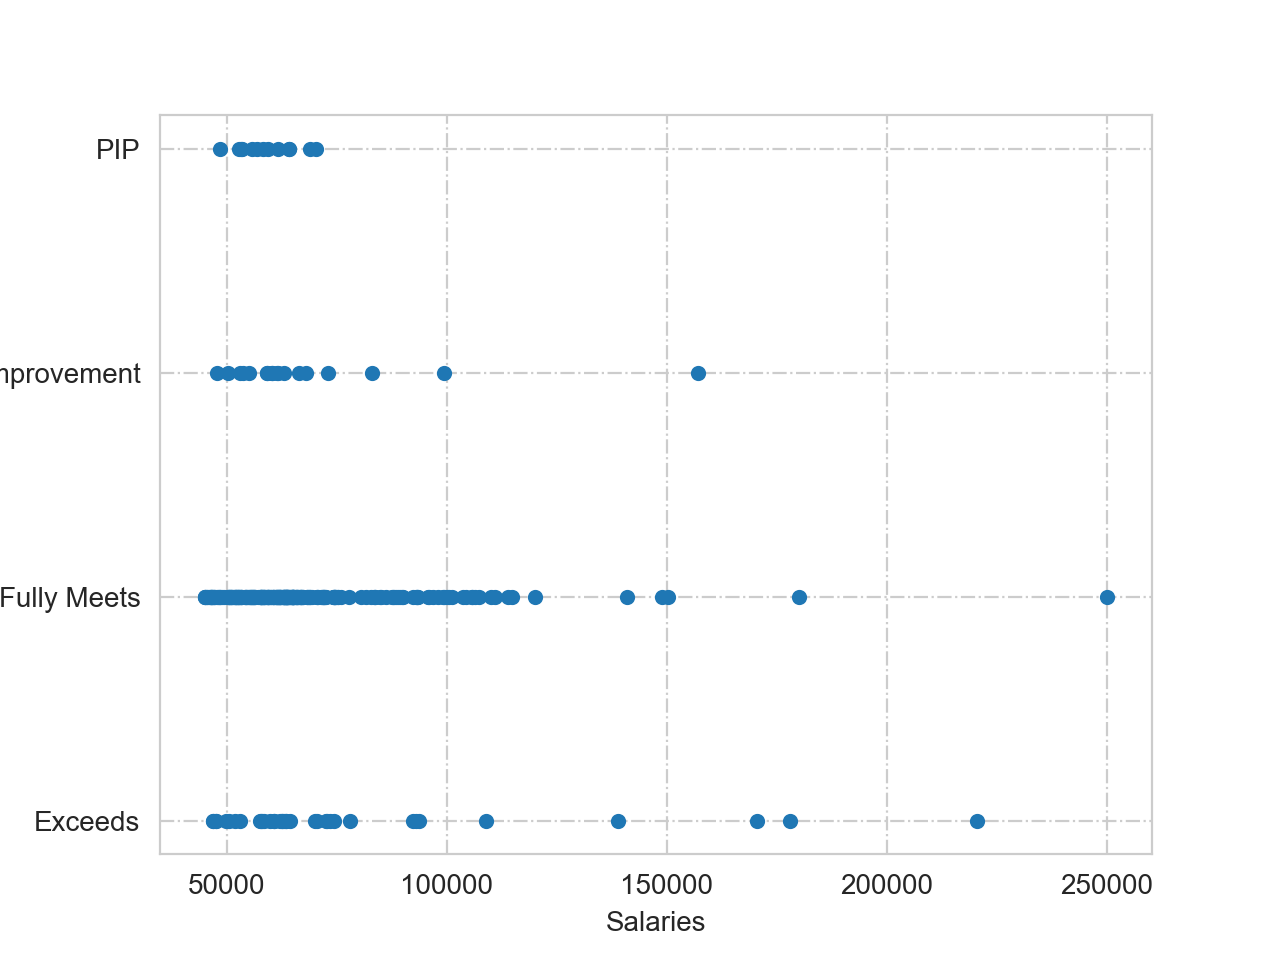

In [175]:
fig=df.plot.scatter(x="Salary",y="PerformanceScore")
plt.xlabel('Salaries');
plt.ylabel('Performance Scores');


Text(0, 0.5, 'Employment Satisfaction')

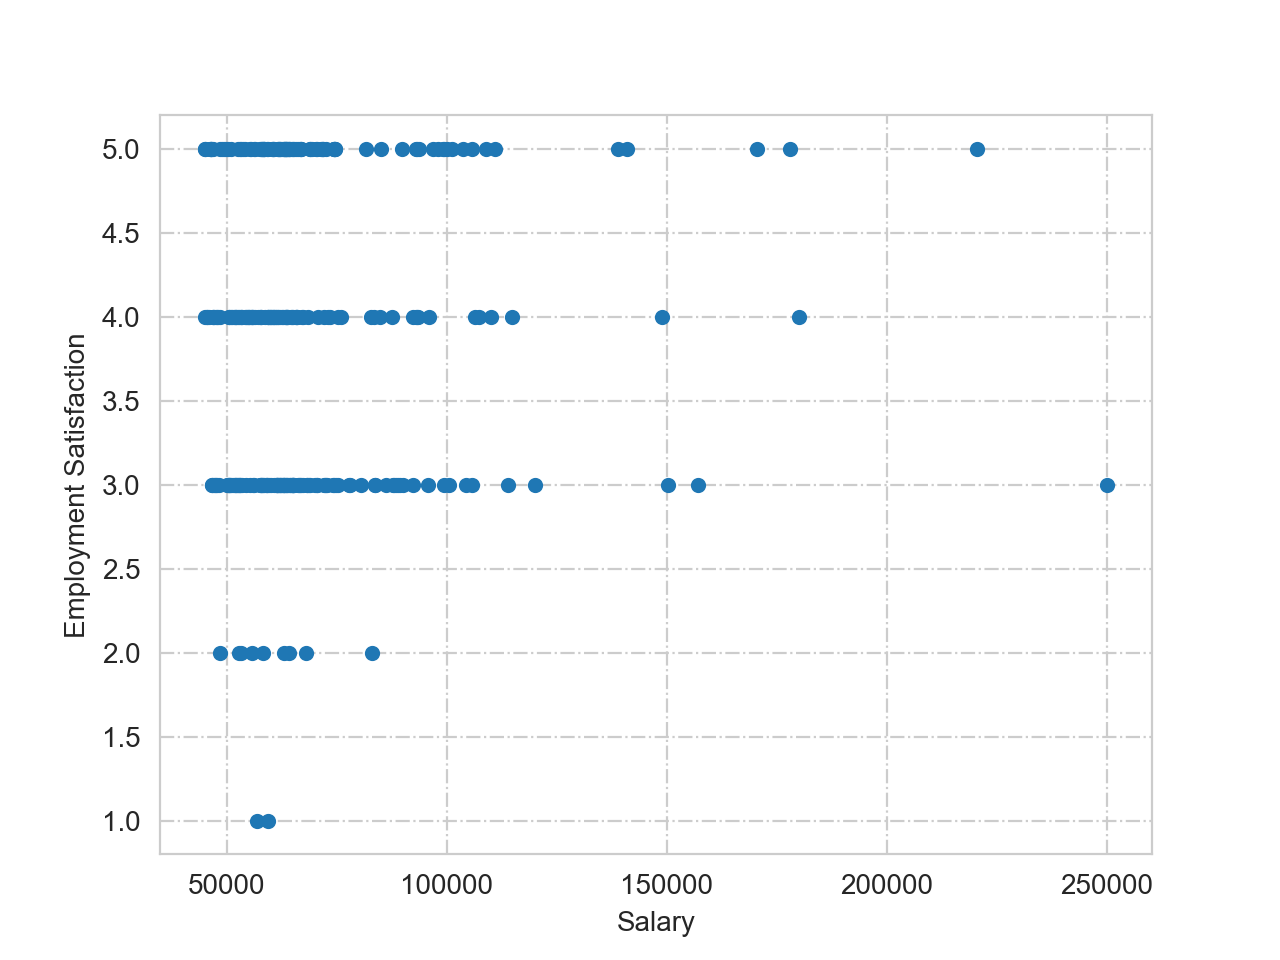

In [176]:
df.plot.scatter(x="Salary",y="EmpSatisfaction")
plt.xlabel('Salary')
plt.ylabel('Employment Satisfaction')


C:\Users\ostab\AppData\Local\Temp\ipykernel_24028\3096812517.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


Text(0.5, 0, 'Recruitment Source')

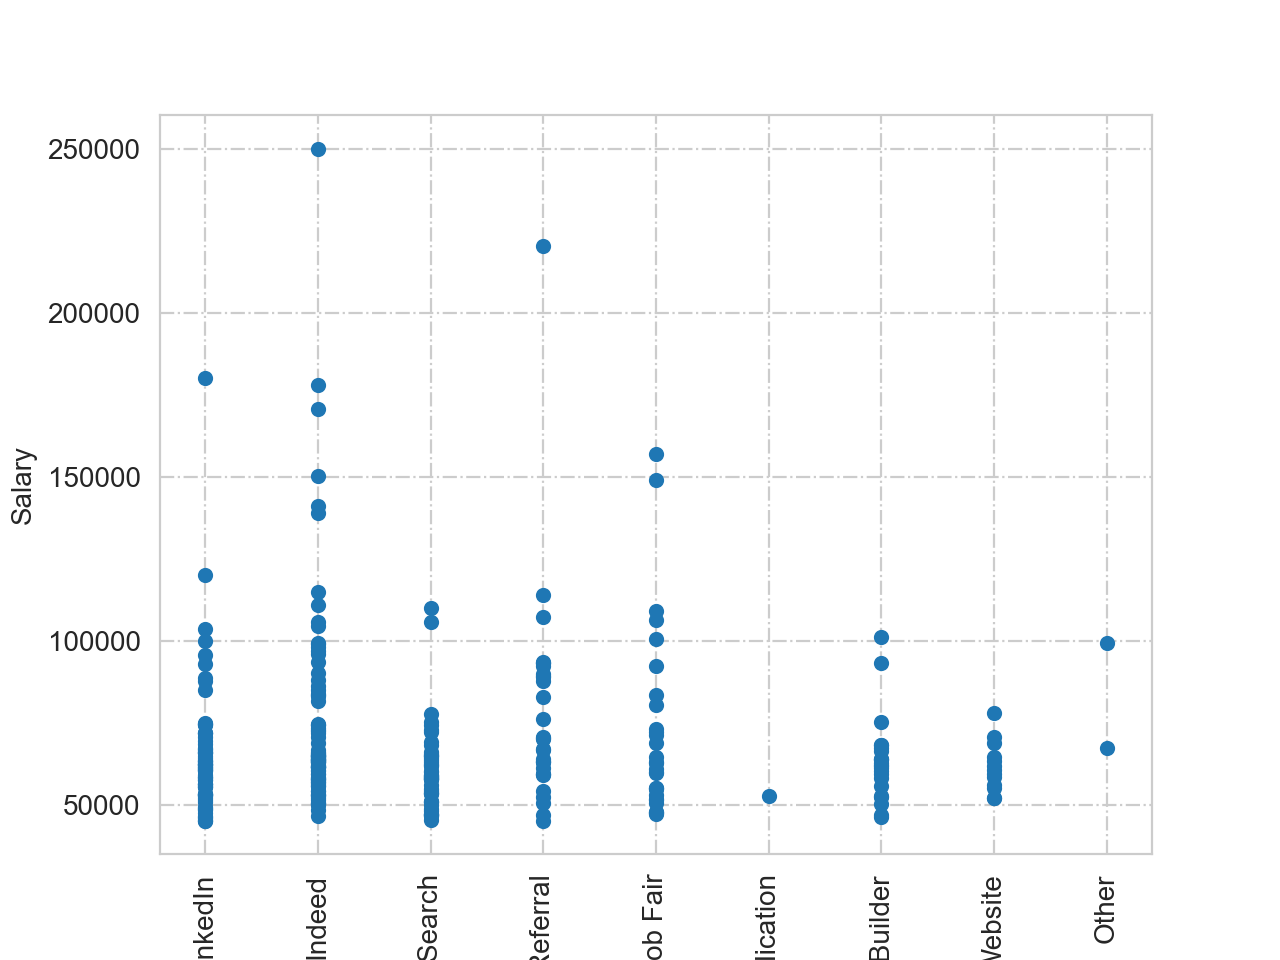

In [185]:
fig=df.plot.scatter(y="Salary",x="RecruitmentSource")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.ylabel('Salary')
plt.xlabel('Recruitment Source')


Text(0, 0.5, 'Engagement Survey')

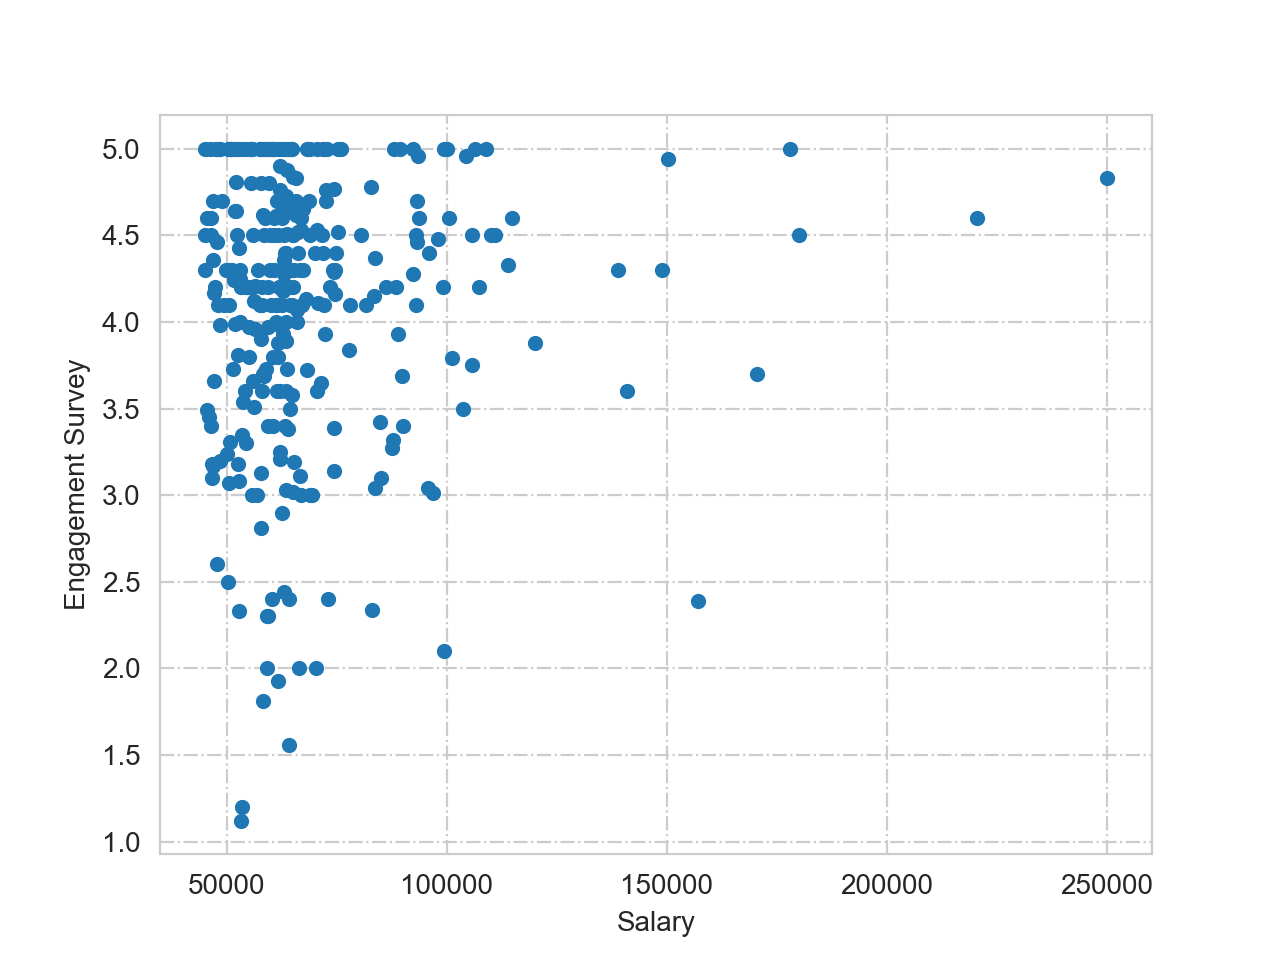

In [178]:
df.plot.scatter(x="Salary",y="EngagementSurvey")
plt.xlabel('Salary')
plt.ylabel('Engagement Survey')

Text(0, 0.5, 'Departments')

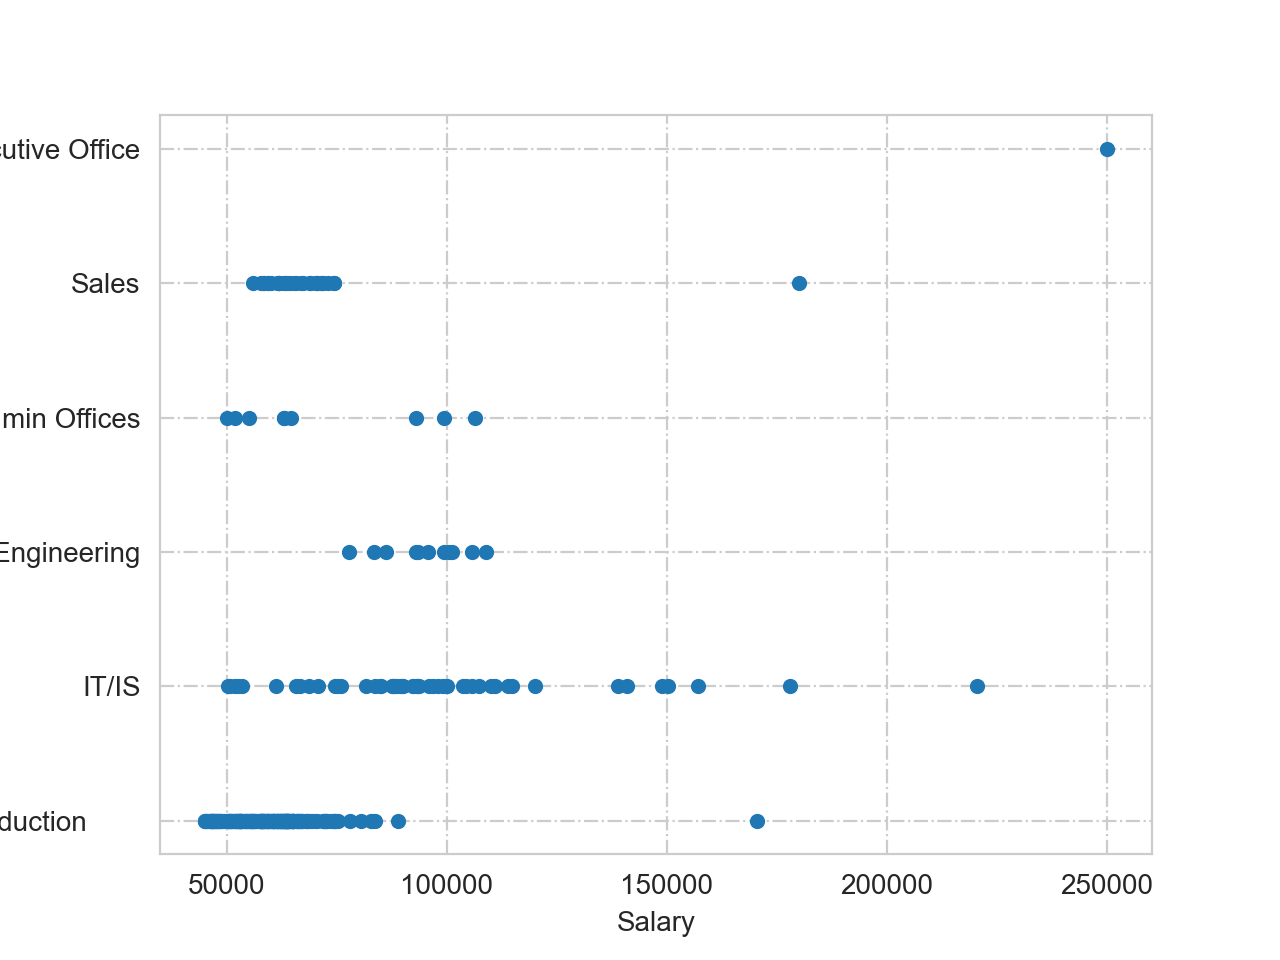

In [186]:
df.plot.scatter(x="Salary",y="Department")
plt.xlabel('Salary')
plt.ylabel('Departments')

### About the 'Days late in the last 30 days'

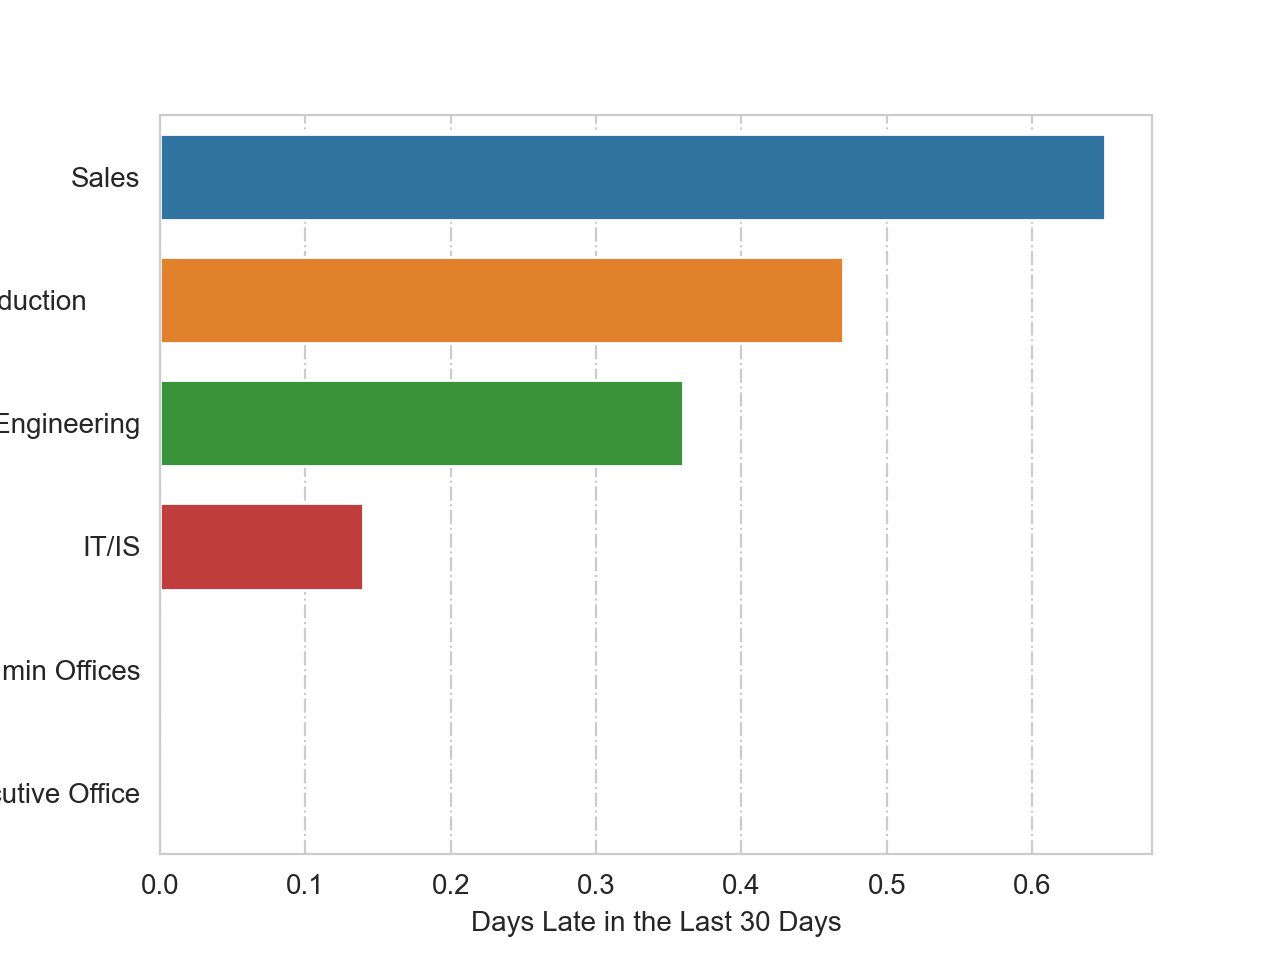

In [187]:
sns.barplot(round(df.groupby(['Department'])[['DaysLateLast30']].mean().reset_index(), 2).sort_values(by=['DaysLateLast30'], ascending=False), x='DaysLateLast30', y='Department', width=0.7, orient='h')
plt.xlabel('Days Late in the Last 30 Days');


In [188]:
#The below code assigns department names to the department ID's.
# Dept ID 1= HR, 2 = IT, 3= Operations, 4= Marketing, 5= Accounting, 6=Sales. 

df1 = pd.read_csv("hrdata.csv")
 
def AssignDeptNames(row):
    if row == 1:
        return 'Human Resources'
    elif row == 2:
        return 'Information Technology'
    elif row == 3:
        return 'Operations'
    elif row ==4:
        return 'Marketing'
    elif row == 5:
        return 'Accounting'
    else:
        return 'Sales'
    
df1['DeptName'] = df1['DeptID'].map(AssignDeptNames)

In [189]:
#Find the unique values in the Performance Scores column. 
df1.PerformanceScore.unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [190]:
# Assign a numeric value to the Performance Scores column.
# Exceed = 5, Fully Meets = 3, Needs Improvement = 1, PIP = 0

def PerformanceNumericLabels(columnname):
    if columnname =='Exceeds':
        return 5
    elif columnname == 'Fully Meets':
        return 3
    elif columnname== 'Needs Improvement':
        return 1
    else:
        return 0

df1['PerformanceNumericLabels'] = df1['PerformanceScore'].map(PerformanceNumericLabels)
#display(df1.head())

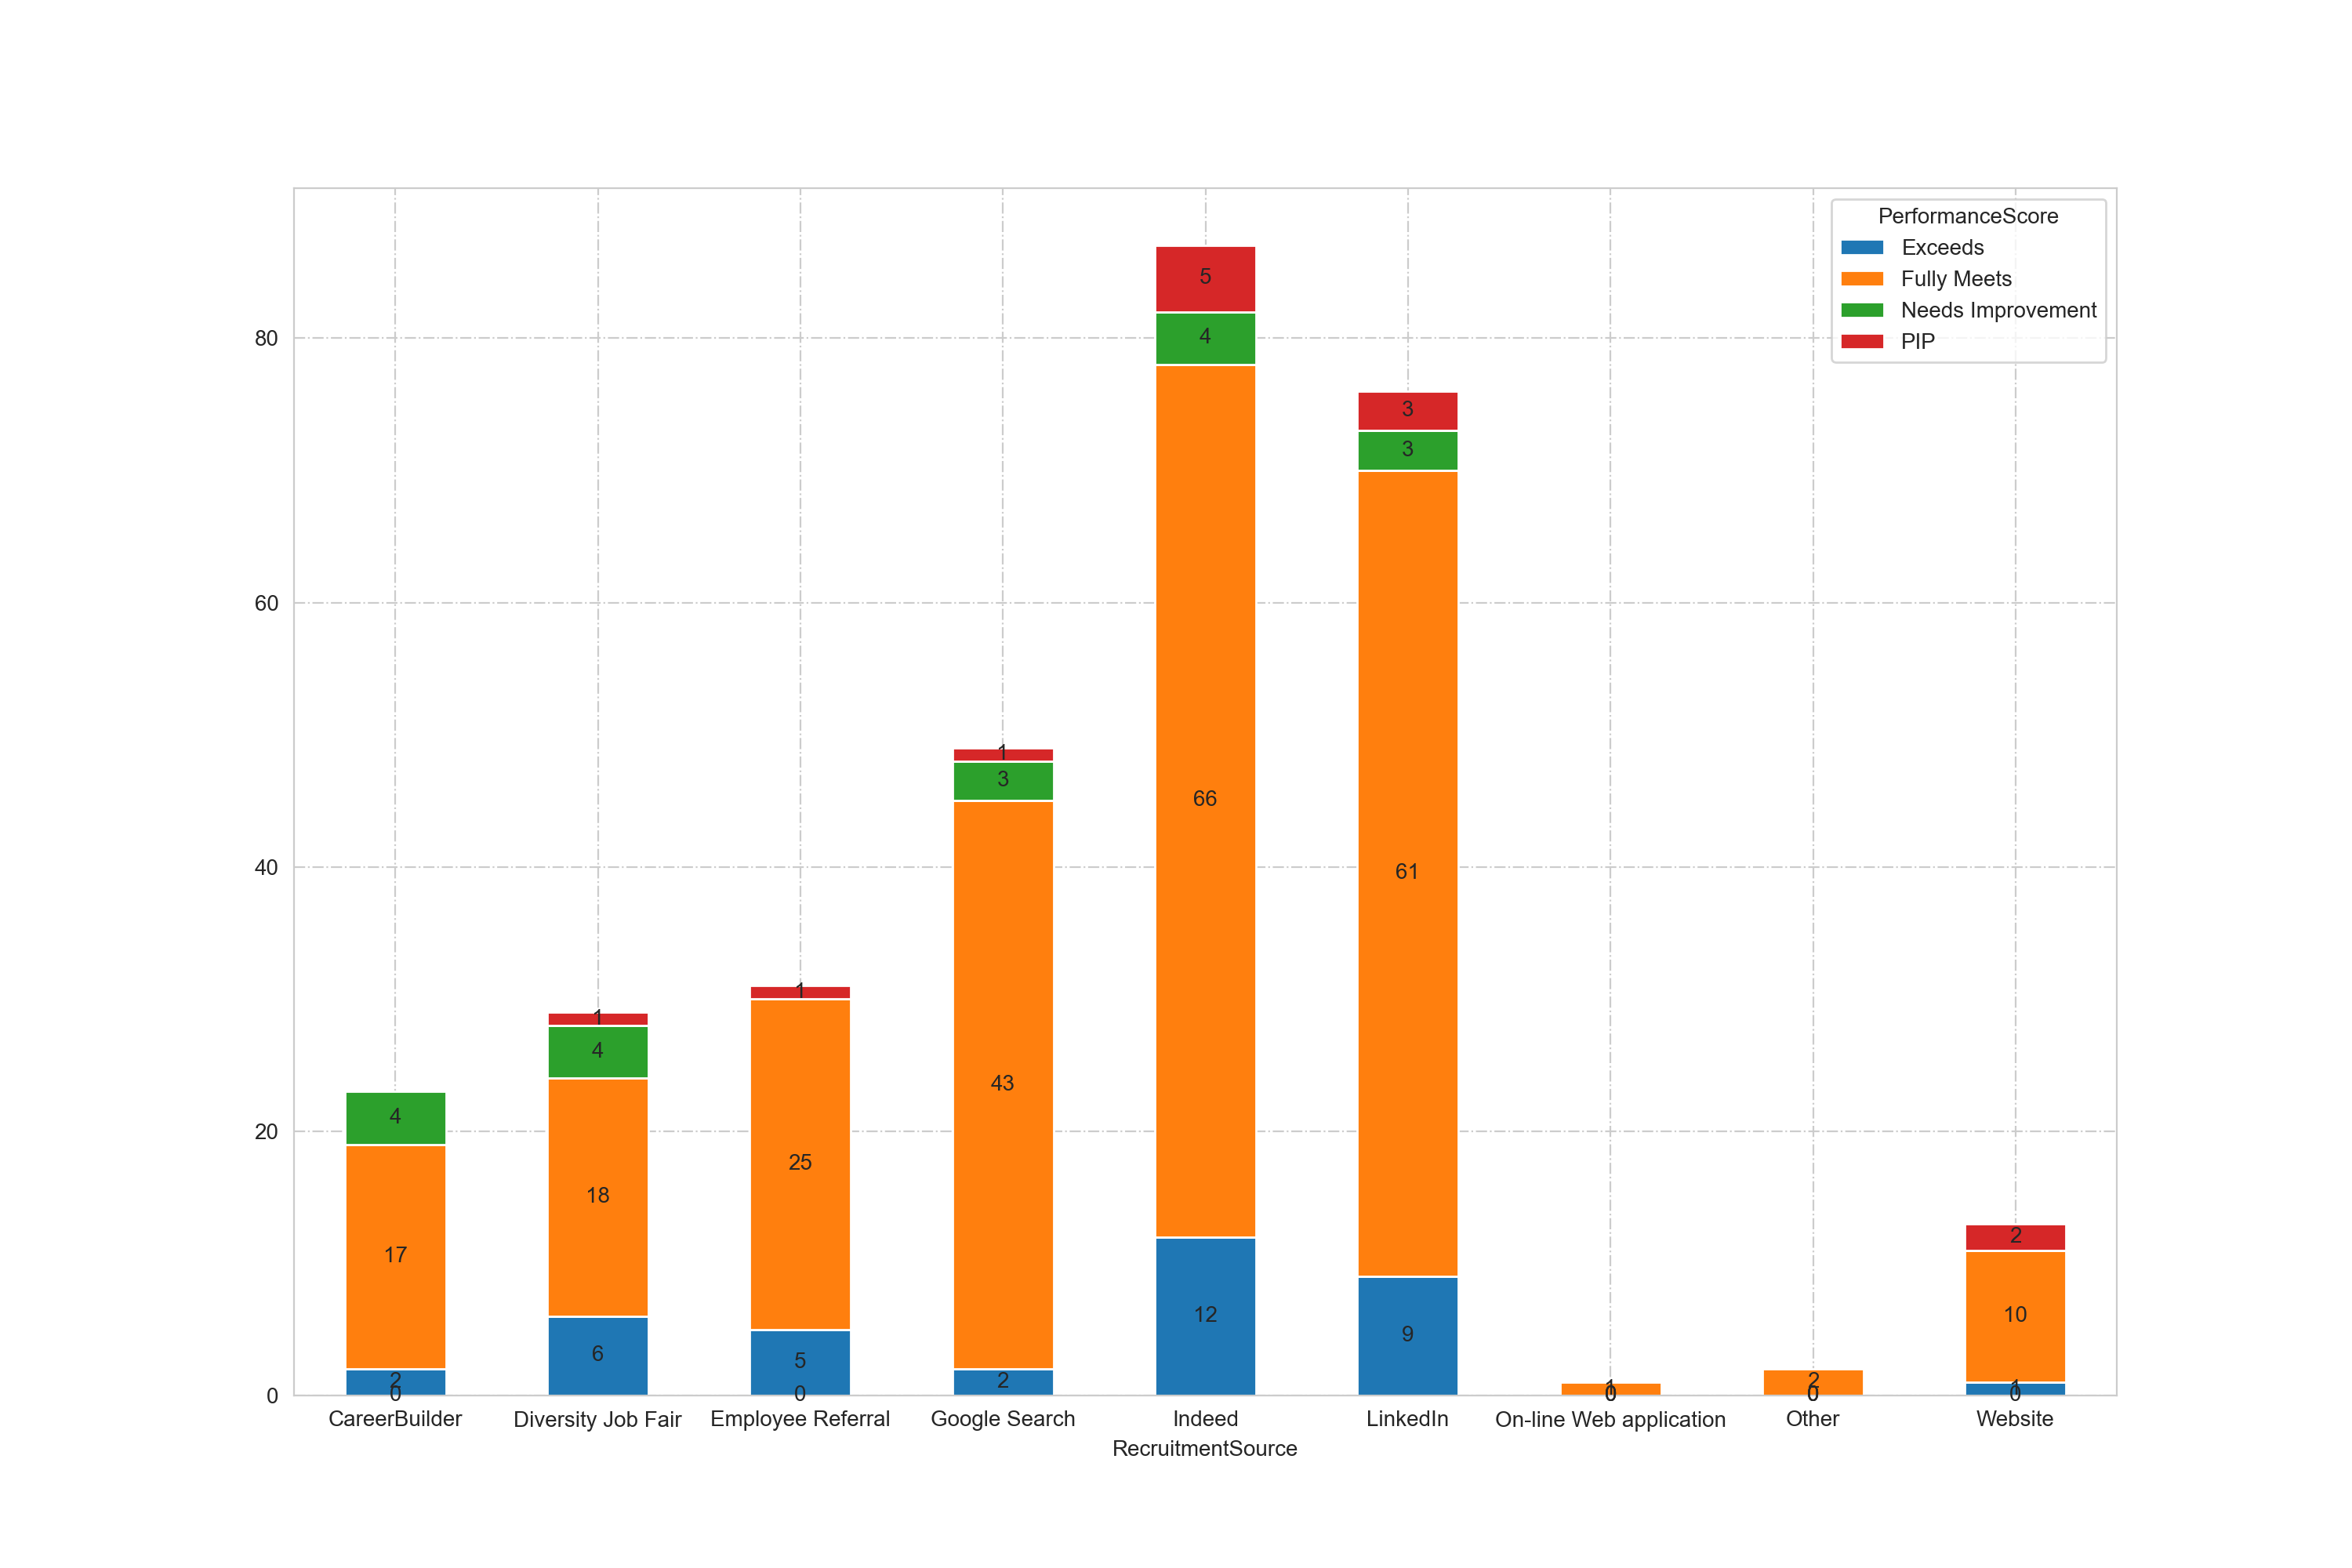

In [191]:
# From which Job source are we getting high performers(Exceeds) and Low Performers(Needs Improvements, PIP)
JobSourceVPerfScore = pd.crosstab(df1.RecruitmentSource, df1.PerformanceScore)

#Plotting a bar chart.
ax = JobSourceVPerfScore.plot(kind='bar',figsize=(15,10),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
    
#The above code plots a stacked bar graph for RecruitmentSource and PerformanceScore.Something very evident is employees with Performance score 
#of "Fully Meets" are coming from Indeed and LinkedIn.
#Look at the Performance score Legend on the right. 

### What is the Staff Turnover in the Company?

In [192]:
total=0
total_list=[]
hired_list=[]
left_list=[]
mean_list=[]
turnover_list=[]
df['YearofHire'] = df['DateofHire'].dt.year
df['YearofTermination'] = df['DateofTermination'].dt.year

for year in df['YearofHire'].sort_values().unique():
    
    hired = df.query('YearofHire == @year').Employee_Name.count()
    left = df.query('YearofTermination == @year').Employee_Name.count()
    total = total + hired - left
    total_list.append(total)
    hired_list.append(hired)
    left_list.append(left)
    
for i in range(len(total_list)):
    if i==0:
        mean = (0 + total_list[i]) / 2
        mean_list.append(mean)
    else:
        mean = (total_list[i-1] + total_list[i]) / 2
        mean_list.append(mean)
        
    turnover = ((left_list[i] / mean_list[i])*100).round(2) 
    turnover_list.append(turnover)
    

print('Total at the end of each year : \n', total_list)
print('Terminated each year : \n', left_list)
print('Hired each year : \n', hired_list)
print('Average number of staff per year : \n', mean_list)  
print('Staff turnover per year : \n', turnover_list)

Total at the end of each year : 
 [1, 3, 6, 13, 21, 101, 138, 169, 216, 229, 221, 219, 207]
Terminated each year : 
 [0, 0, 0, 0, 1, 3, 8, 13, 13, 23, 22, 8, 13]
Hired each year : 
 [1, 2, 3, 7, 9, 83, 45, 44, 60, 36, 14, 6, 1]
Average number of staff per year : 
 [0.5, 2.0, 4.5, 9.5, 17.0, 61.0, 119.5, 153.5, 192.5, 222.5, 225.0, 220.0, 213.0]
Staff turnover per year : 
 [0.0, 0.0, 0.0, 0.0, 5.88, 4.92, 6.69, 8.47, 6.75, 10.34, 9.78, 3.64, 6.1]


In [193]:
x = df['YearofHire'].sort_values().unique()

fig = make_subplots(rows=2, cols=1, row_heights=[0.2, 0.8], 
                    vertical_spacing=0.01, shared_xaxes=True)

fig.add_trace(go.Scatter(name="Staff Turnover", 
                         x=x, y=turnover_list, mode="lines+markers+text",
                         text=turnover_list, textposition="middle left", 
                         marker_color='magenta'), 
             1, 1)

fig.add_trace(go.Bar(name="Staff Hired", 
                     x=x, 
                     y=hired_list,
                     text=hired_list,
                     textposition='outside',
                     marker_color='green'),  
             2, 1)

fig.add_trace(go.Bar(name="Staff Total", 
                     x=x, 
                     y=total_list,
                     text=total_list,
                     textposition='outside',
                     marker_color='cadetblue'),  
             2, 1)

fig.add_trace(go.Bar(name="Staff Terminated", 
                     x=x, 
                     y=left_list,
                     text=left_list,
                     textposition='outside',
                     marker_color='red'),  
             2, 1)

fig.update_traces(textfont_size=10)

fig.update_layout(title='Annual Staff Turnover from 2006 to 2018',
                  title_x=0.5, margin=dict(t=50, l=0, r=0, b=0))

fig

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [195]:
my_df = df.select_dtypes(exclude=[object])

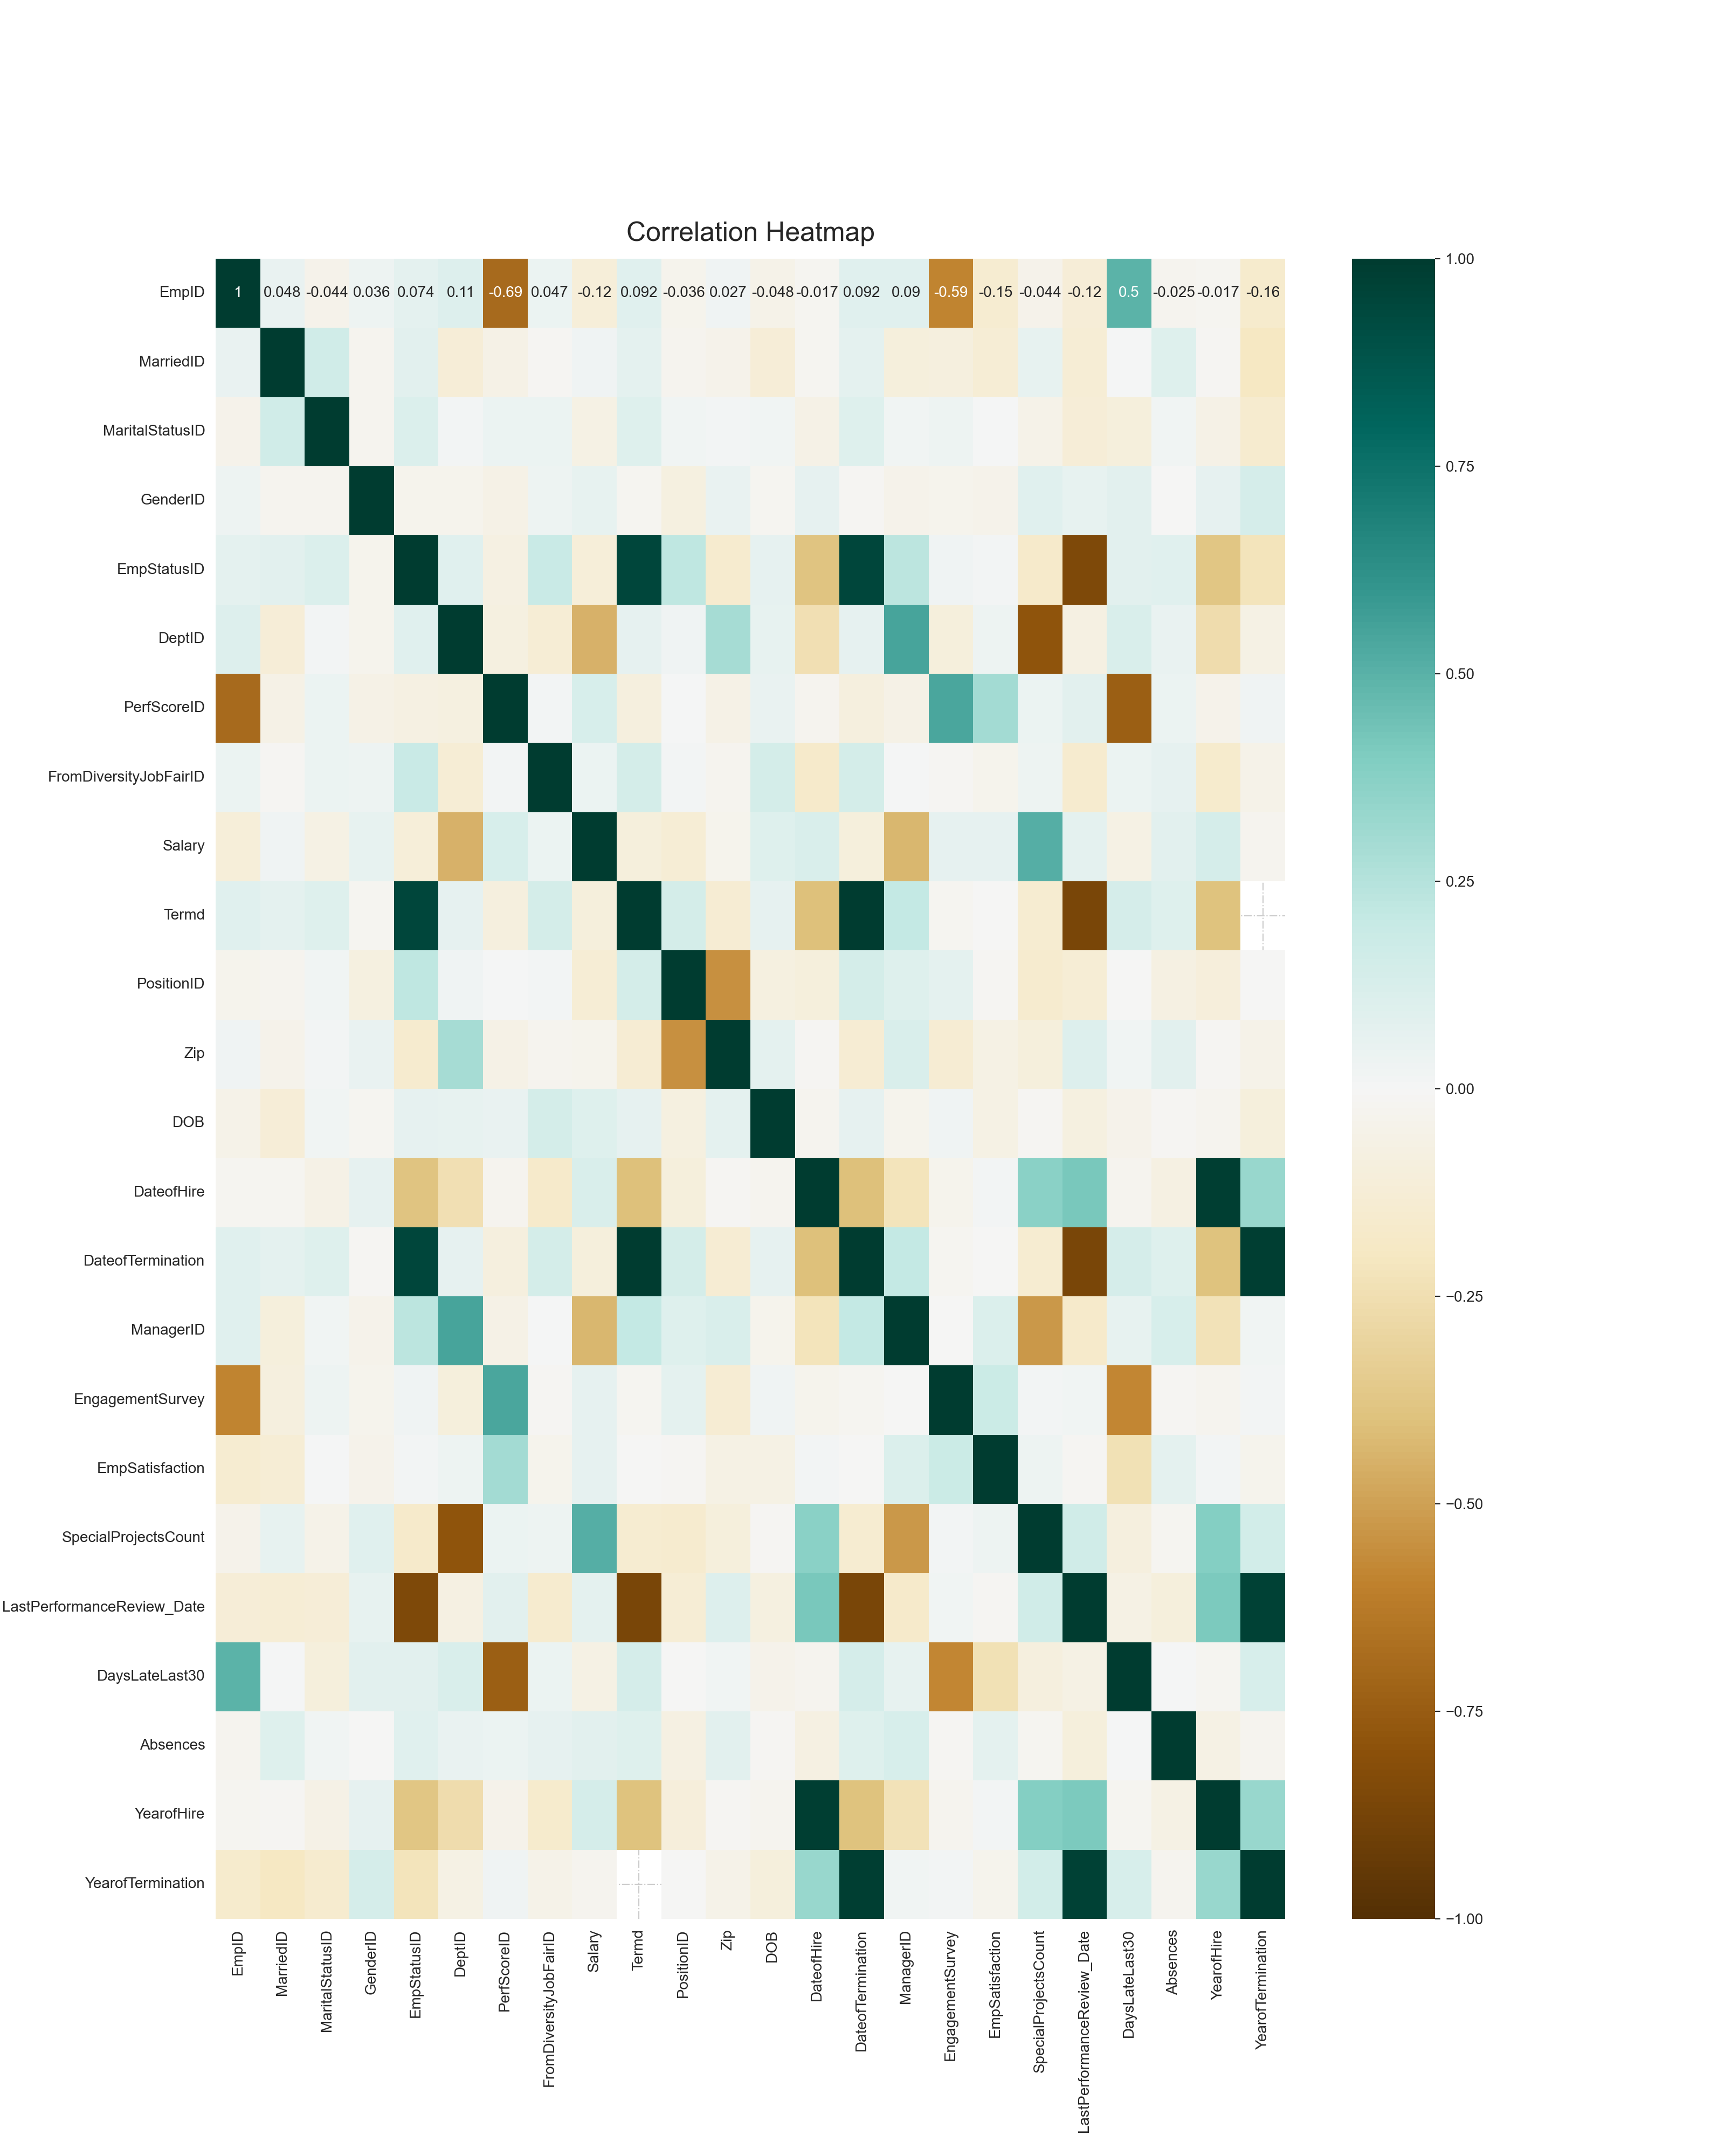

In [196]:
plt.figure(figsize=(16, 20))
heatmap = sns.heatmap(my_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

## Build & Training a Machine Learning Algorithm:

In [198]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [199]:
#Getting column names for individual exploration
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'YearofHire', 'YearofTermination'],
      dtype='object')

In [200]:
df['Sex'].unique()

array(['M ', 'F'], dtype=object)

In [201]:
df['Department'].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [202]:
df['Position'].unique()

array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'Data Analyst ', 'CIO'], dtype=object)

In [203]:
df['RecruitmentSource'].unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

In [204]:
df.dropna(how='all', inplace=True)

In [205]:
#Exploring performance score and it's ID
df[['PerformanceScore','PerfScoreID']]

,PerformanceScore,PerfScoreID
0,Exceeds,4
1,Fully Meets,3
2,Fully Meets,3
3,Fully Meets,3
4,Fully Meets,3
...,...,...
306,Fully Meets,3
307,PIP,1
308,Exceeds,4
309,Fully Meets,3


In [206]:
print(df['PerformanceScore'].unique())
print(df['PerfScoreID'].unique())

['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']
[4 3 2 1]


In [207]:
#Let's now drop some columns that are irrelevant
df.drop(['DaysLateLast30','LastPerformanceReview_Date',
         'DateofTermination','TermReason','DaysLateLast30','Zip'],axis=1,inplace=True)

### Creating the machine learning model

In [208]:
#select only necessary columns
df_select = df[['MaritalDesc','Position','RecruitmentSource', 'SpecialProjectsCount', 'Absences', 'Termd']]

In [209]:
df_select

,MaritalDesc,Position,RecruitmentSource,SpecialProjectsCount,Absences,Termd
0,Single,Production Technician I,LinkedIn,0,1,0
1,Married,Sr. DBA,Indeed,6,17,1
2,Married,Production Technician II,LinkedIn,0,3,1
3,Married,Production Technician I,Indeed,0,15,0
4,Divorced,Production Technician I,Google Search,0,2,1
...,...,...,...,...,...,...
306,Single,Production Technician II,LinkedIn,0,13,0
307,Single,Production Technician I,Google Search,0,4,1
308,Single,CIO,Employee Referral,6,16,0
309,Single,Data Analyst,Employee Referral,5,11,0


In [210]:
df_select.head()

,MaritalDesc,Position,RecruitmentSource,SpecialProjectsCount,Absences,Termd
0,Single,Production Technician I,LinkedIn,0,1,0
1,Married,Sr. DBA,Indeed,6,17,1
2,Married,Production Technician II,LinkedIn,0,3,1
3,Married,Production Technician I,Indeed,0,15,0
4,Divorced,Production Technician I,Google Search,0,2,1


In [211]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MaritalDesc           311 non-null    object
 1   Position              311 non-null    object
 2   RecruitmentSource     311 non-null    object
 3   SpecialProjectsCount  311 non-null    int64 
 4   Absences              311 non-null    int64 
 5   Termd                 311 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 14.7+ KB


In [212]:
df_select.isnull().sum()

MaritalDesc             0
Position                0
RecruitmentSource       0
SpecialProjectsCount    0
Absences                0
Termd                   0
dtype: int64

In [214]:
from sklearn.preprocessing import LabelEncoder
lePos = LabelEncoder()
df_select['Position'] = lePos.fit_transform(df_select['Position'])
df_select['Position'].unique()

C:\Users\ostab\AppData\Local\Temp\ipykernel_24028\2134155056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([22, 30, 23, 27, 17,  6,  9, 12, 29, 21,  0,  2, 28,  4, 10, 31, 24,
        3, 16, 18, 13, 11,  1, 19, 25, 26, 15, 20,  8, 14,  7,  5])

In [215]:
leRS = LabelEncoder()
df_select['RecruitmentSource'] = leRS.fit_transform(df_select['RecruitmentSource'])
df_select['RecruitmentSource'].unique()

C:\Users\ostab\AppData\Local\Temp\ipykernel_24028\2772184473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([5, 4, 3, 2, 1, 6, 0, 8, 7])

In [216]:
leMD = LabelEncoder()
df_select['MaritalDesc'] = leMD.fit_transform(df_select['MaritalDesc'])
df_select['MaritalDesc'].unique()

C:\Users\ostab\AppData\Local\Temp\ipykernel_24028\3806149178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([3, 1, 0, 4, 2])

In [217]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   MaritalDesc           311 non-null    int32
 1   Position              311 non-null    int32
 2   RecruitmentSource     311 non-null    int32
 3   SpecialProjectsCount  311 non-null    int64
 4   Absences              311 non-null    int64
 5   Termd                 311 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 11.1 KB


In [218]:
df_select.head(10)

,MaritalDesc,Position,RecruitmentSource,SpecialProjectsCount,Absences,Termd
0,3,22,5,0,1,0
1,1,30,4,6,17,1
2,1,23,5,0,3,1
3,1,22,4,0,15,0
4,0,22,3,0,2,1
5,3,22,5,0,15,0
6,3,27,5,4,19,0
7,4,22,2,0,19,0
8,3,22,1,0,4,0
9,0,17,4,6,16,0


In [219]:
# drop the 'Termd' column from the DataFrame to create the feature matrix
x = df_select.drop('Termd', axis=1)
# create the target vector
y = df_select['Termd']

In [220]:
#training Model predictions 

In [221]:
# split the data into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=22)

In [222]:
ss = StandardScaler()

In [223]:
ss.fit(x_train)

StandardScaler()

In [224]:
x_trainnor = ss.transform(x_train)
x_testnor = ss.transform(x_test)

In [225]:
# check shape
print('x_trainnor: ', x_trainnor.shape)
print('x_testnor: ', x_testnor.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_trainnor:  (248, 5)
x_testnor:  (63, 5)
y_train:  (248,)
y_test:  (63,)


In [226]:
# create a dictionary of models
models = {
    "   K-NearestNeighbors": KNeighborsClassifier(),
    "   LogisticRegression": LogisticRegression(),
    "SupportVectorMachine": SVC(),
    "         DecisionTree": DecisionTreeClassifier(),
    "        NeuralNetwork": MLPClassifier(),
    "         RandomForest": RandomForestClassifier(n_estimators=500),
    "         XGBClassifier": XGBClassifier(n_estimators=700)
}

# loop through the models and fit each one to the training data
for name, model in models.items():
    model.fit(x_trainnor, y_train)
    print(name + " trained.")

   K-NearestNeighbors trained.
   LogisticRegression trained.
SupportVectorMachine trained.
         DecisionTree trained.


C:\Users\ostab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


        NeuralNetwork trained.
         RandomForest trained.
         XGBClassifier trained.


   K-NearestNeighbors Accuracy: 65.08%


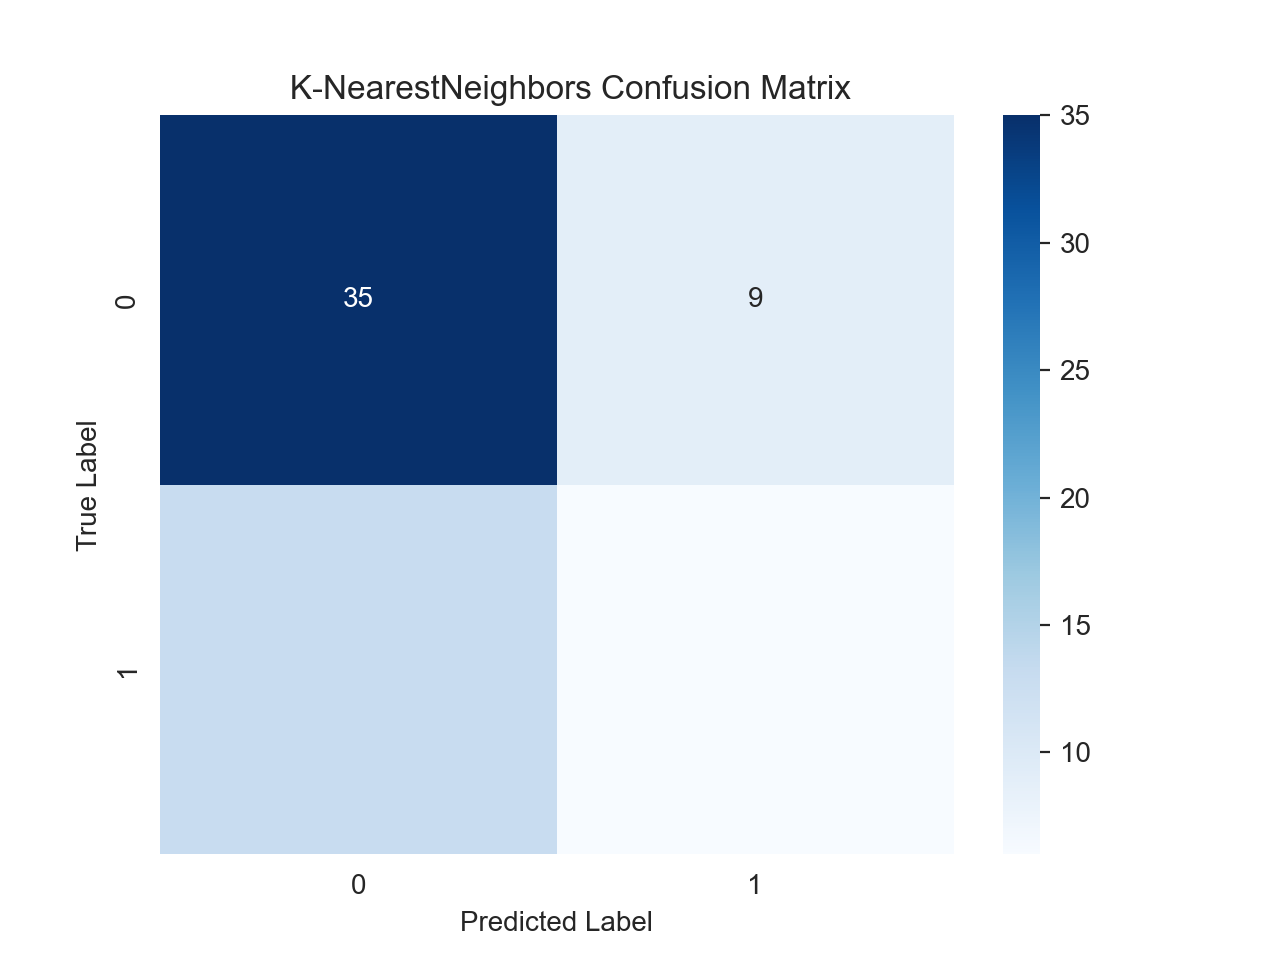

   K-NearestNeighbors Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        44
           1       0.40      0.32      0.35        19

    accuracy                           0.65        63
   macro avg       0.56      0.56      0.56        63
weighted avg       0.63      0.65      0.64        63

[[35  9]
 [13  6]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        44
           1       0.40      0.32      0.35        19

    accuracy                           0.65        63
   macro avg       0.56      0.56      0.56        63
weighted avg       0.63      0.65      0.64        63

   LogisticRegression Accuracy: 69.84%


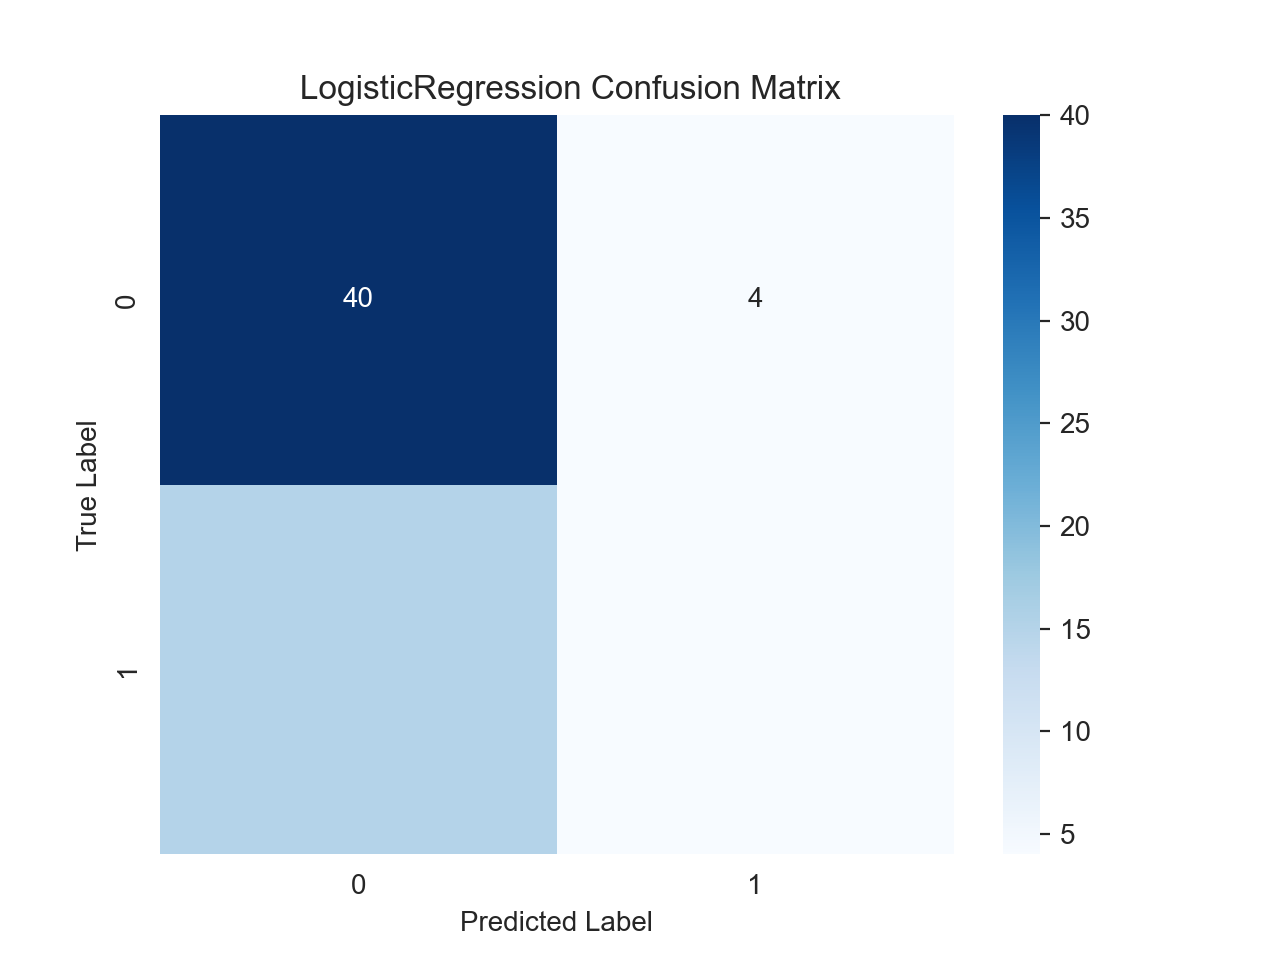

   LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        44
           1       0.50      0.21      0.30        19

    accuracy                           0.70        63
   macro avg       0.61      0.56      0.55        63
weighted avg       0.66      0.70      0.65        63

[[40  4]
 [15  4]]
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        44
           1       0.50      0.21      0.30        19

    accuracy                           0.70        63
   macro avg       0.61      0.56      0.55        63
weighted avg       0.66      0.70      0.65        63

SupportVectorMachine Accuracy: 71.43%


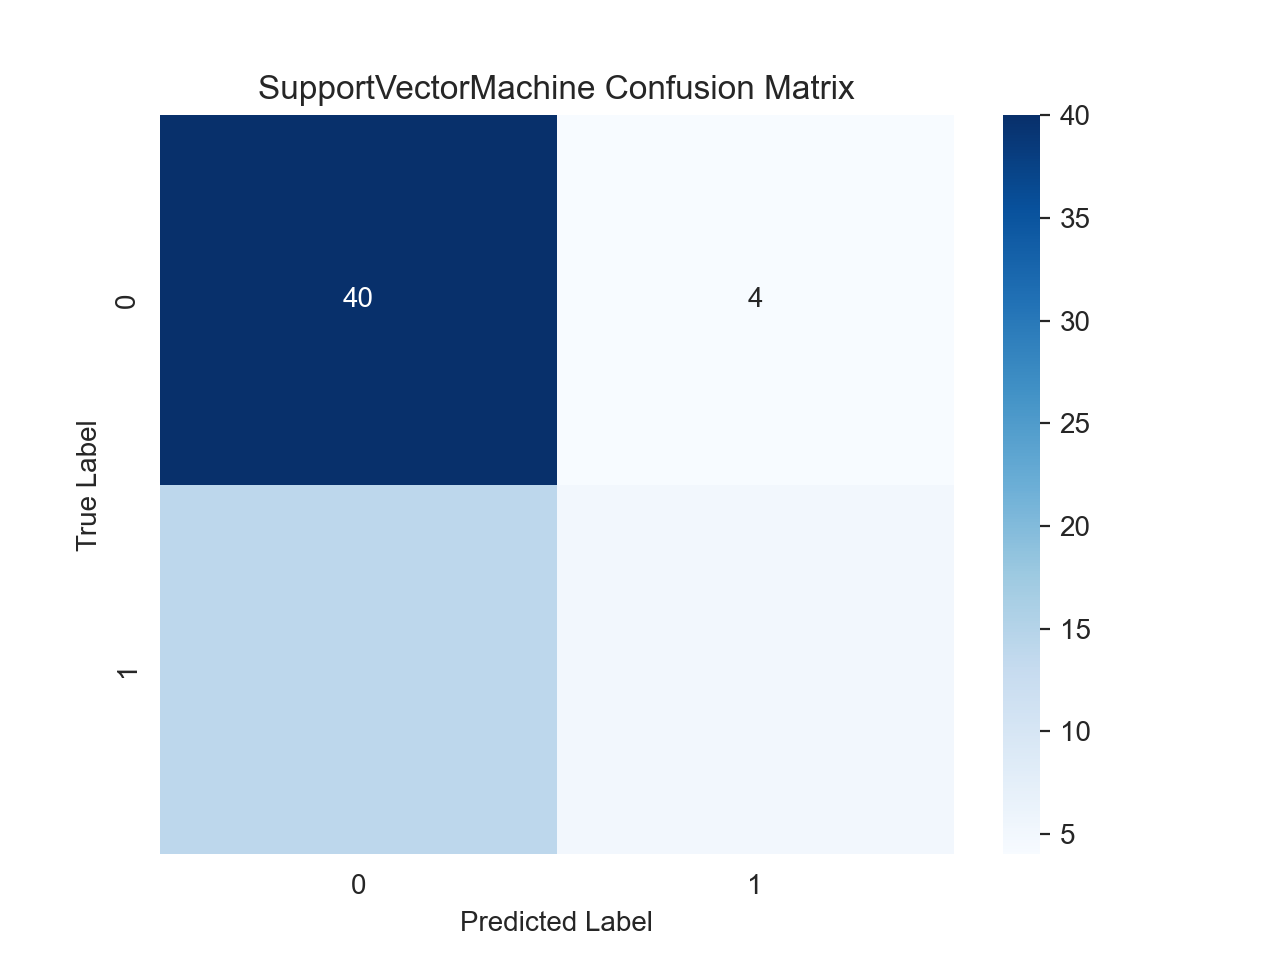

SupportVectorMachine Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        44
           1       0.56      0.26      0.36        19

    accuracy                           0.71        63
   macro avg       0.65      0.59      0.59        63
weighted avg       0.68      0.71      0.68        63

[[40  4]
 [14  5]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        44
           1       0.56      0.26      0.36        19

    accuracy                           0.71        63
   macro avg       0.65      0.59      0.59        63
weighted avg       0.68      0.71      0.68        63

         DecisionTree Accuracy: 71.43%


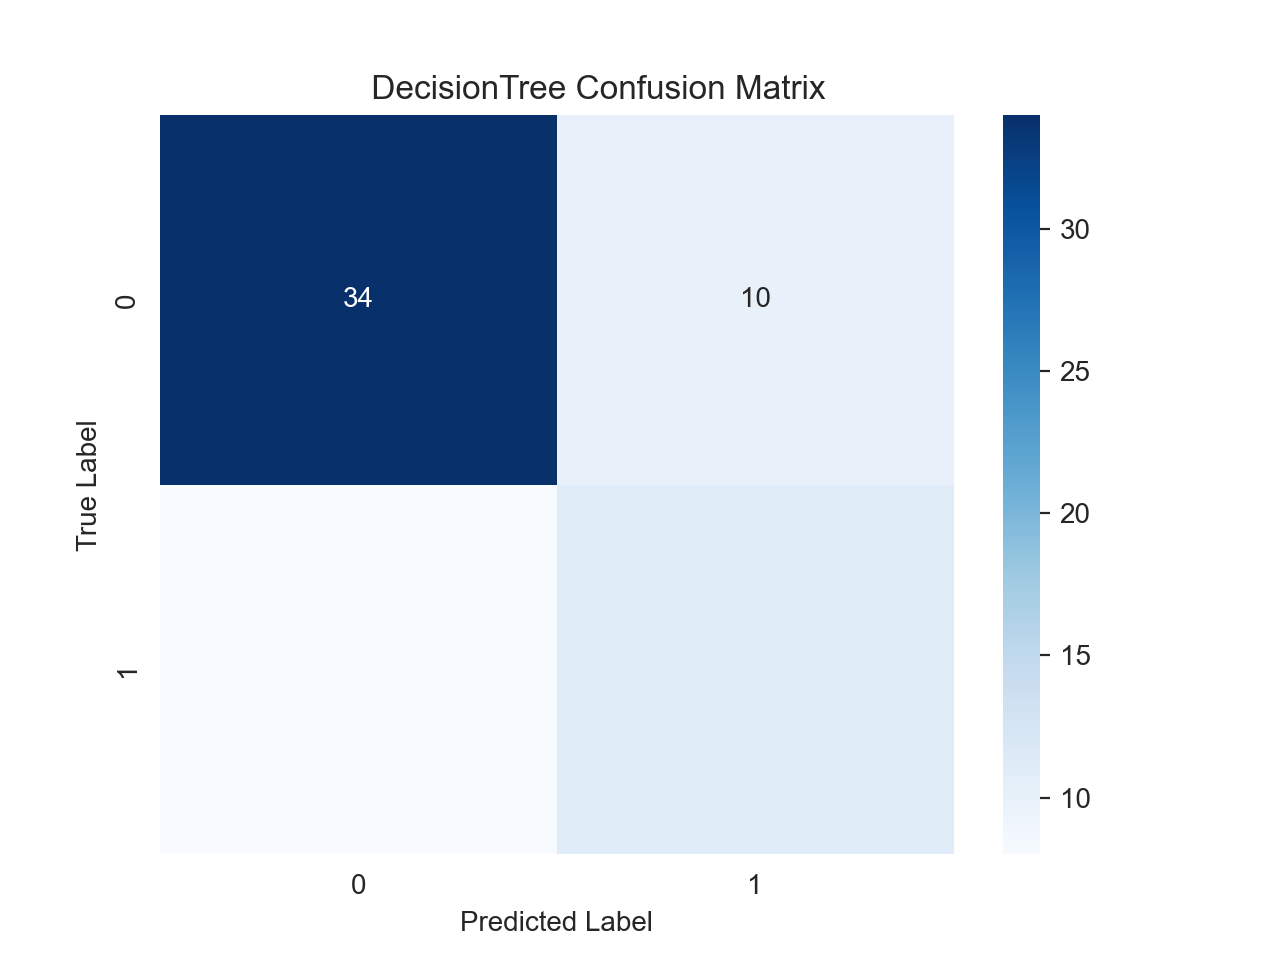

         DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        44
           1       0.52      0.58      0.55        19

    accuracy                           0.71        63
   macro avg       0.67      0.68      0.67        63
weighted avg       0.72      0.71      0.72        63

[[34 10]
 [ 8 11]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        44
           1       0.52      0.58      0.55        19

    accuracy                           0.71        63
   macro avg       0.67      0.68      0.67        63
weighted avg       0.72      0.71      0.72        63

        NeuralNetwork Accuracy: 66.67%


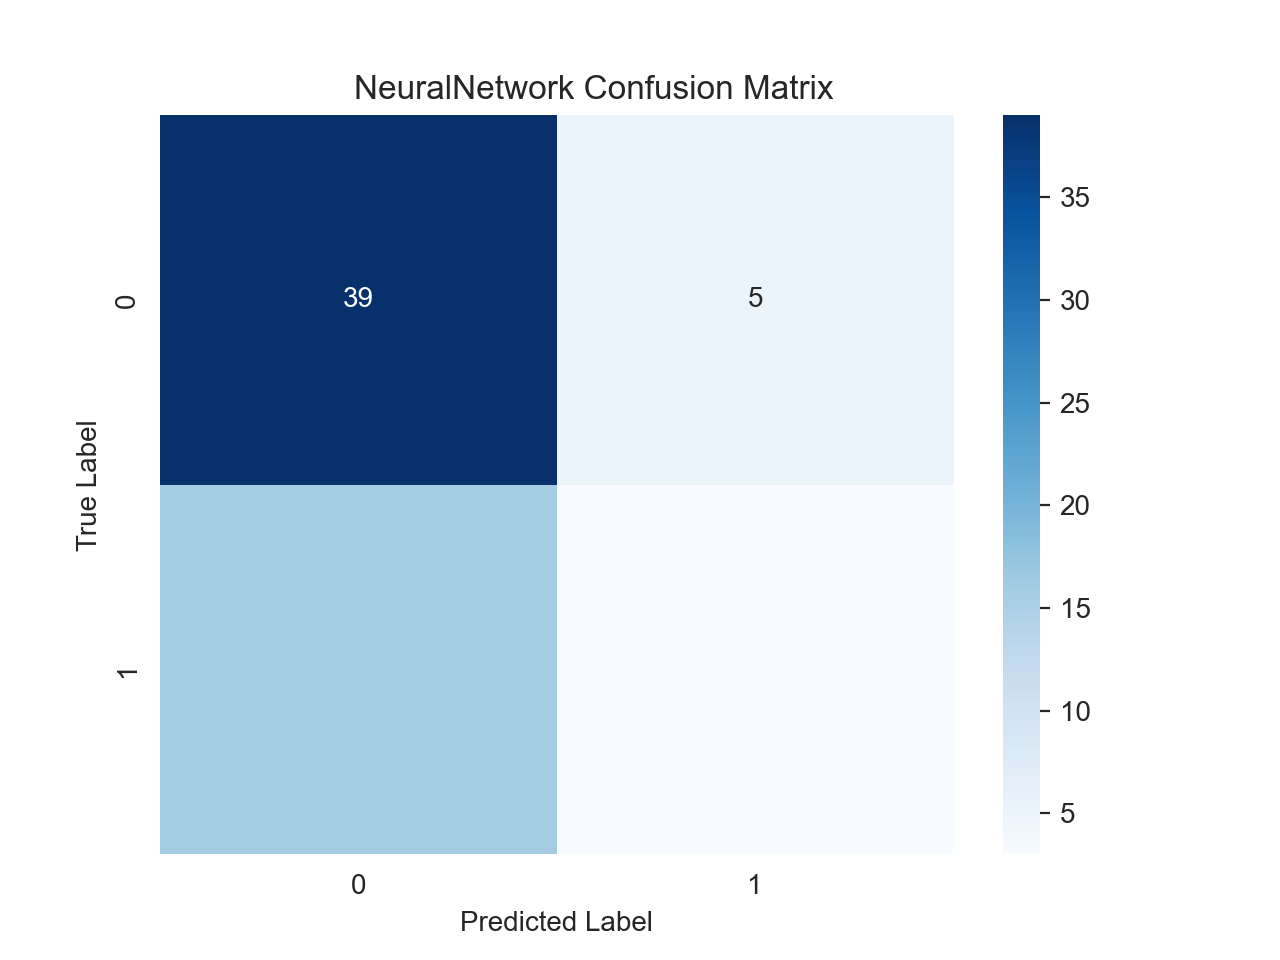

        NeuralNetwork Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        44
           1       0.38      0.16      0.22        19

    accuracy                           0.67        63
   macro avg       0.54      0.52      0.51        63
weighted avg       0.61      0.67      0.62        63

[[39  5]
 [16  3]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        44
           1       0.38      0.16      0.22        19

    accuracy                           0.67        63
   macro avg       0.54      0.52      0.51        63
weighted avg       0.61      0.67      0.62        63

         RandomForest Accuracy: 69.84%


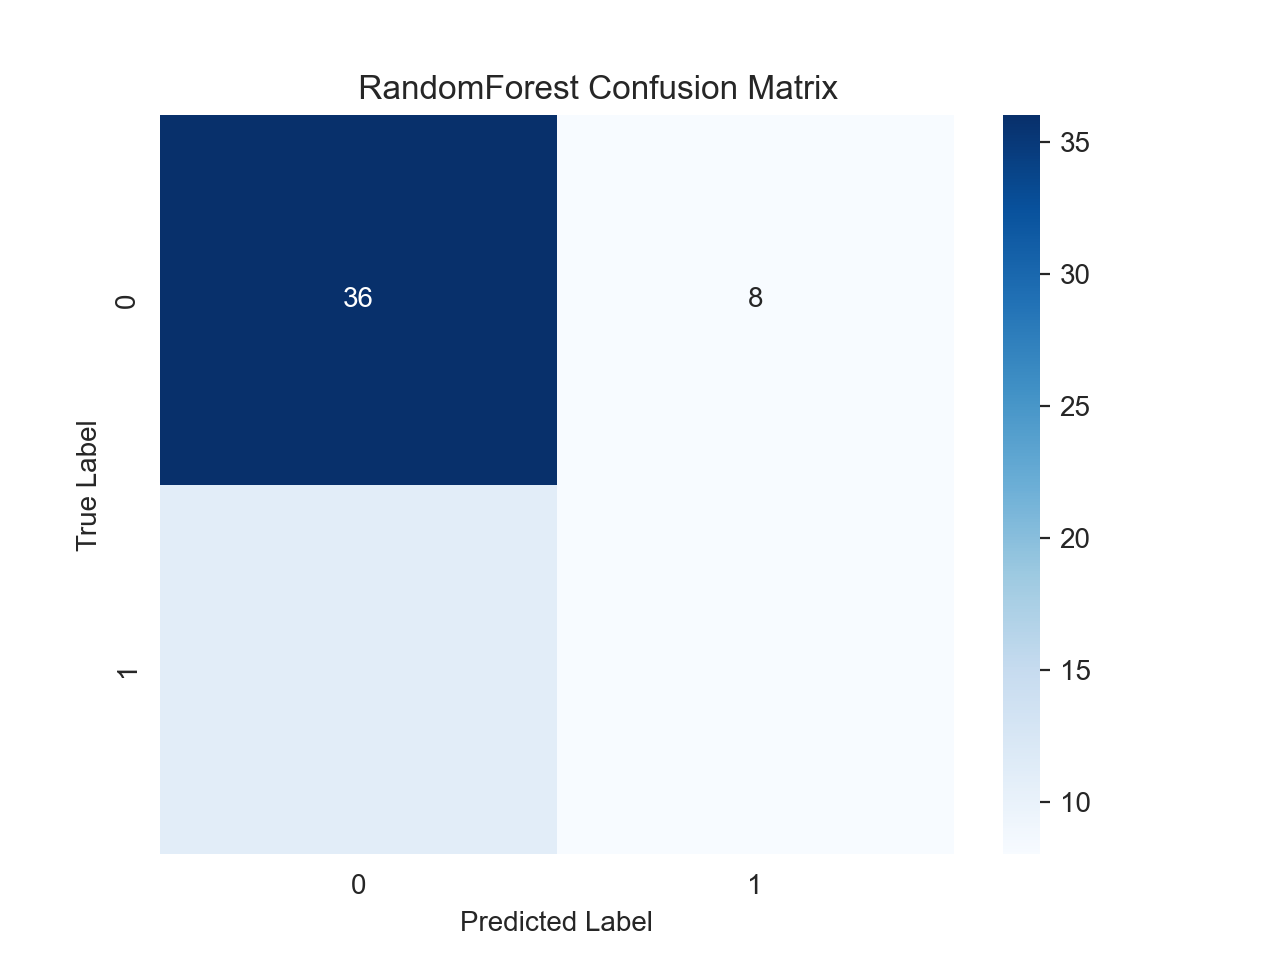

         RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        44
           1       0.50      0.42      0.46        19

    accuracy                           0.70        63
   macro avg       0.63      0.62      0.62        63
weighted avg       0.69      0.70      0.69        63

[[36  8]
 [11  8]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        44
           1       0.50      0.42      0.46        19

    accuracy                           0.70        63
   macro avg       0.63      0.62      0.62        63
weighted avg       0.69      0.70      0.69        63

         XGBClassifier Accuracy: 63.49%


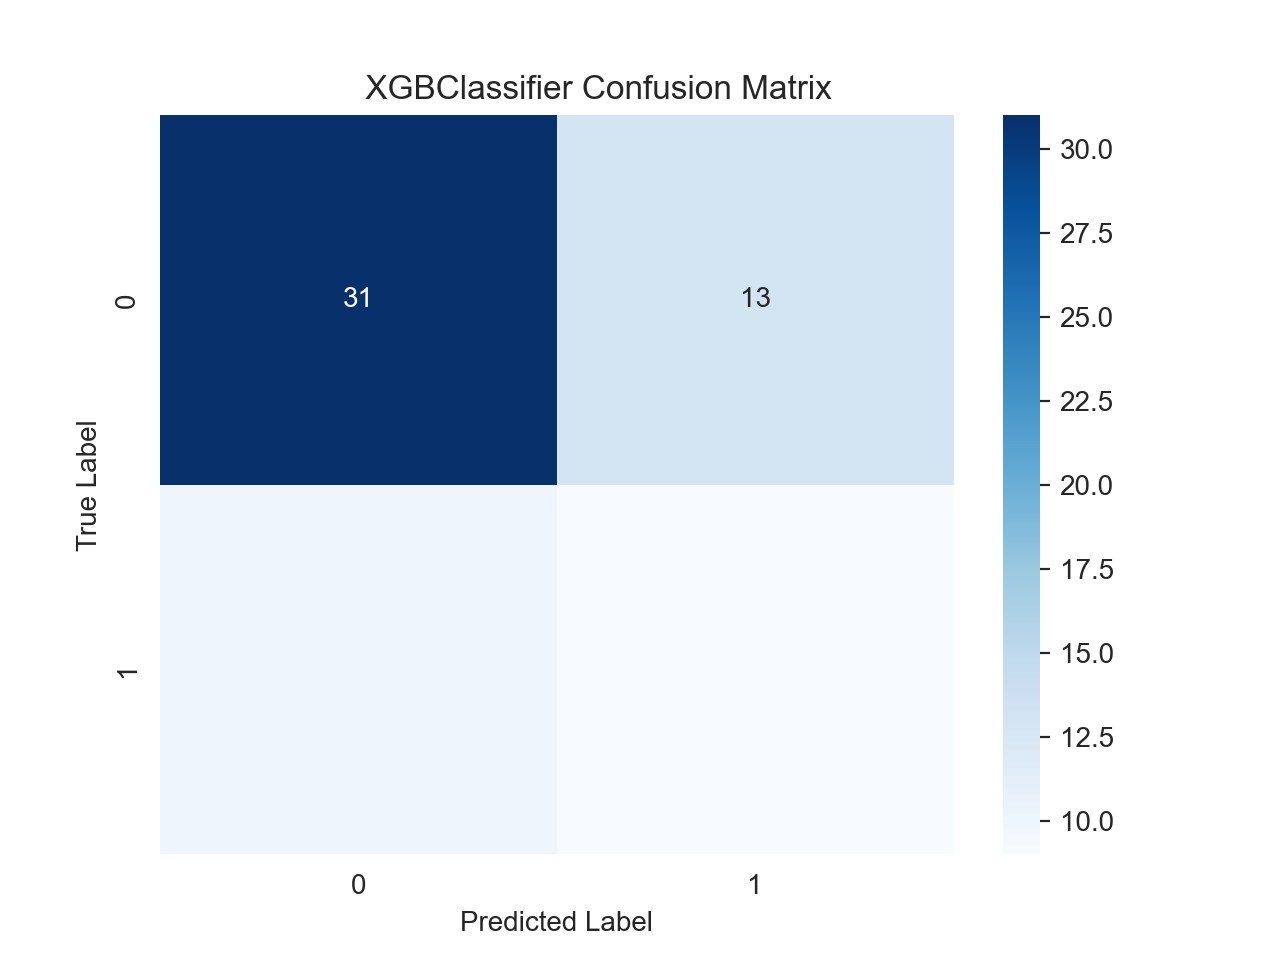

         XGBClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        44
           1       0.41      0.47      0.44        19

    accuracy                           0.63        63
   macro avg       0.58      0.59      0.58        63
weighted avg       0.65      0.63      0.64        63

[[31 13]
 [10  9]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        44
           1       0.41      0.47      0.44        19

    accuracy                           0.63        63
   macro avg       0.58      0.59      0.58        63
weighted avg       0.65      0.63      0.64        63



In [227]:
# loop through the models and make predictions on the test data
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(x_testnor, y_test) * 100))
    y_pred = model.predict(x_testnor)
    
  # plot the confusion matrix as a heatmap
    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    ax.set_title(name + " Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    plt.show()
    
    # print the classification report for each model
    report = classification_report(y_test, y_pred)
    print(name + " Classification Report:")
    print(report)   
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [228]:
x_trainnor

array([[ 0.9653516 ,  0.54185652,  0.85164329, -0.54722458,  0.97610152],
       [ 0.9653516 ,  0.41036883, -0.80272383, -0.54722458,  0.97610152],
       [ 0.9653516 ,  0.41036883, -1.90563525, -0.54722458, -0.04172543],
       ...,
       [ 0.9653516 ,  0.41036883, -0.25126813, -0.54722458,  0.97610152],
       [ 0.9653516 ,  0.41036883,  0.85164329, -0.54722458,  0.12791239],
       [-0.78854728, -2.3508726 ,  0.30018758,  1.11285733, -0.72027674]])

In [229]:
DecisionTree = DecisionTreeClassifier()

In [230]:
DecisionTree.fit(x_trainnor, y_train)

DecisionTreeClassifier()

In [231]:
y_pred = DecisionTree.predict(x_testnor)

In [232]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [233]:
x1 = np.array([["Single", "Production Technician I","LinkedIn", 2, 15]])

In [234]:
x1

array([['Single', 'Production Technician I', 'LinkedIn', '2', '15']],
      dtype='<U23')

In [235]:
x1[:, 0] = leMD.transform(x1[:,0])
x1[:, 1] =lePos.transform(x1[:,1])
x1[:, 2] =leRS.transform(x1[:,2])
x1 = x1.astype(float)
x1

array([[ 3., 22.,  5.,  2., 15.]])

In [236]:
y_pred = DecisionTree.predict(x1)
y_pred

array([1], dtype=int64)

In [245]:
#export and save my prediction model
import pickle
data = {"model": DecisionTree, "leMD": leMD , "lePos": lePos, "leRS": leRS }
with open('predictionmodel1.0.pkl', 'wb') as file:
    pickle.dump(data,file)

In [238]:
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [239]:
selector = SelectKBest(k='all', score_func=f_classif)

In [240]:
selector.fit(x_train, y_train)

SelectKBest(k='all')

In [241]:
selector.get_support(indices=True)

array([0, 1, 2, 3, 4], dtype=int64)

In [242]:
x.columns[selector.get_support(indices=True)]

Index(['MaritalDesc', 'Position', 'RecruitmentSource', 'SpecialProjectsCount',
       'Absences'],
      dtype='object')

In [243]:
Select_columns  = pd.DataFrame({'Important_Feature':x.columns[selector.get_support(indices=True)],
                  'Score':selector.get_support(indices=True)} )

<Axes: xlabel='Score', ylabel='Important_Feature'>

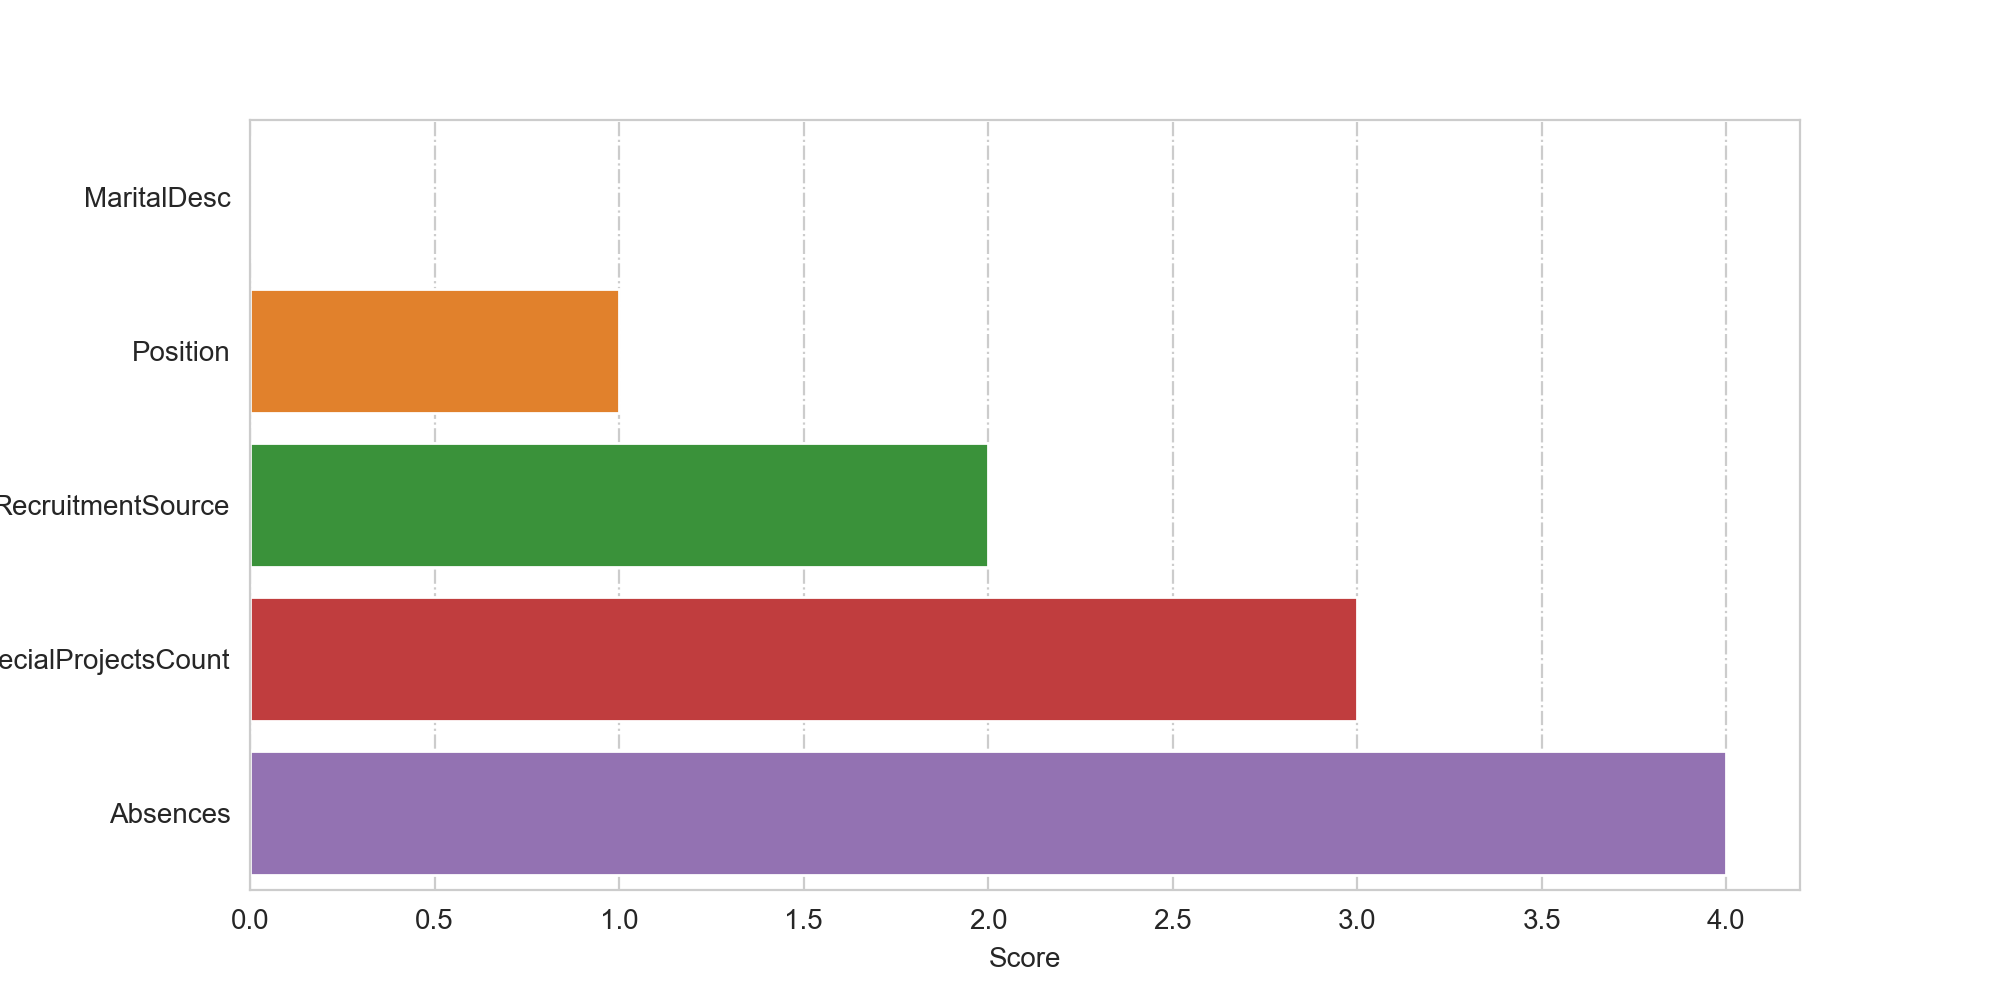

In [244]:
plt.figure(figsize=(10,5))
sns.barplot(x='Score', y='Important_Feature', data=Select_columns)